# ***Hello programers and Engineers out there.***

#### *Let's have a quick analysis on the marvel movie dataset.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# The dataset is given in the documents.
m=pd.read_csv(r"C:\Users\venka\OneDrive\Documents\Downloads\archive (3)\Marvel_Movies_Dataset.csv")

![Marvel Cinematic Universe](https://1.bp.blogspot.com/-0hT5rFAEl3A/WGmUcR8UAnI/AAAAAAAAMIk/7iAUwOU-GjUrs6IdPPE-9Uv3z4qjDBewQCLcB/s1600/marvel_cinematic_universe_2_0_by_tymann930-d9zjipk.png)

In [4]:
m.drop(columns=['Index'],inplace=True)
m.columns=(col.replace(' ','') for col in m.columns)

In [5]:
# lets just seperate the movies by each hero.
m['hero']=[
    'Iron Man' if 'Iron' in t else
    'Captain America' if 'America' in t else
    'Thor' if 'Thor' in t else
    'Hulk' if 'Hulk' in t else
    'Avengers' if 'Avengers' in t else
    'Guardians' if 'Guardians' in t else
    'Ant-Man' if 'Ant' in t else
    'Doctor Strange' if 'Doctor' in t else
    'Black Panther' if 'Panther' in t else
    'Captain Marvel' if 'Captain Marvel' in t else
    'Spider-Man' if 'Spider' in t else
    'Black Widow' if 'Widow' in t else
    'Shang-Chi' if 'Shang' in t else
    'Eternals' if 'Eternals' in t else
    'The Marvels' if 'The Marvels' in t else
    'Deadpool & Wolverine' if 'Deadpool & Wolverine' in t else
    pd.NA 
    for t in m['Title']
]
m.insert(1,'Hero',m.hero)
m.drop(columns=['hero'],inplace=True)

In [6]:
m['ReleaseDate(DD-MM-YYYY)']=pd.to_datetime(m['ReleaseDate(DD-MM-YYYY)'])

In [25]:
# Some movies have double trouble with two directors! Let's split them up and see who directed what!"
directors=m[(m['Director(1)'].notna())&(m['Director(2)'].notna())]
director=m[(m['Director(1)'].notna())&(m['Director(2)'].isna())]

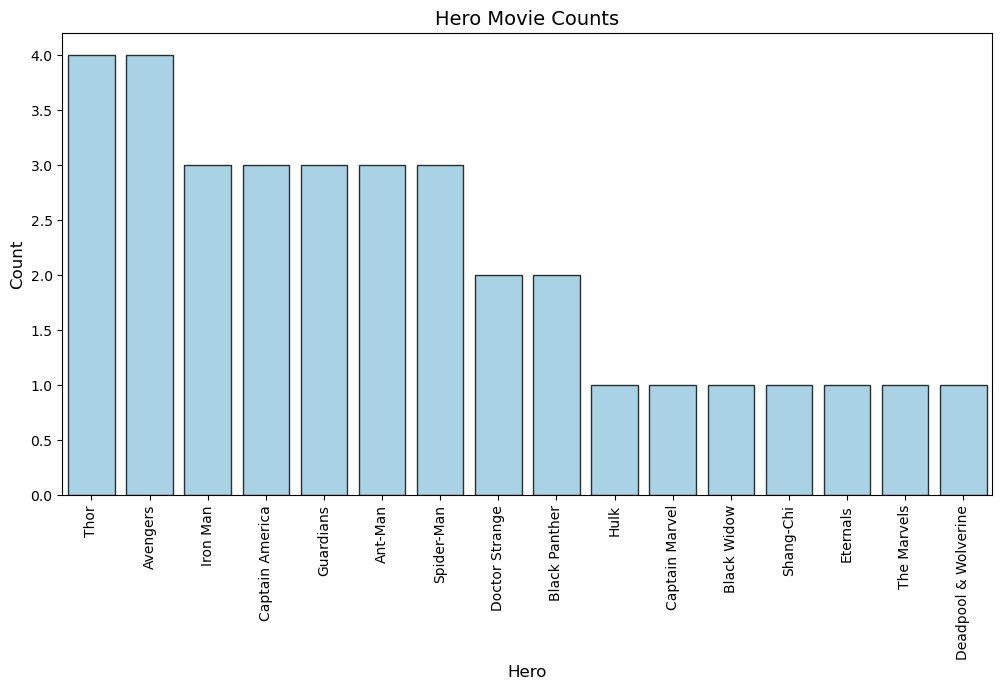

In [7]:
hero_counts=m['Hero'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=hero_counts.index,y=hero_counts.values,color='skyblue',edgecolor='black',alpha=0.8)
plt.title('Hero Movie Counts',fontsize=14)
plt.xlabel('Hero',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90,fontsize=10)
plt.show()

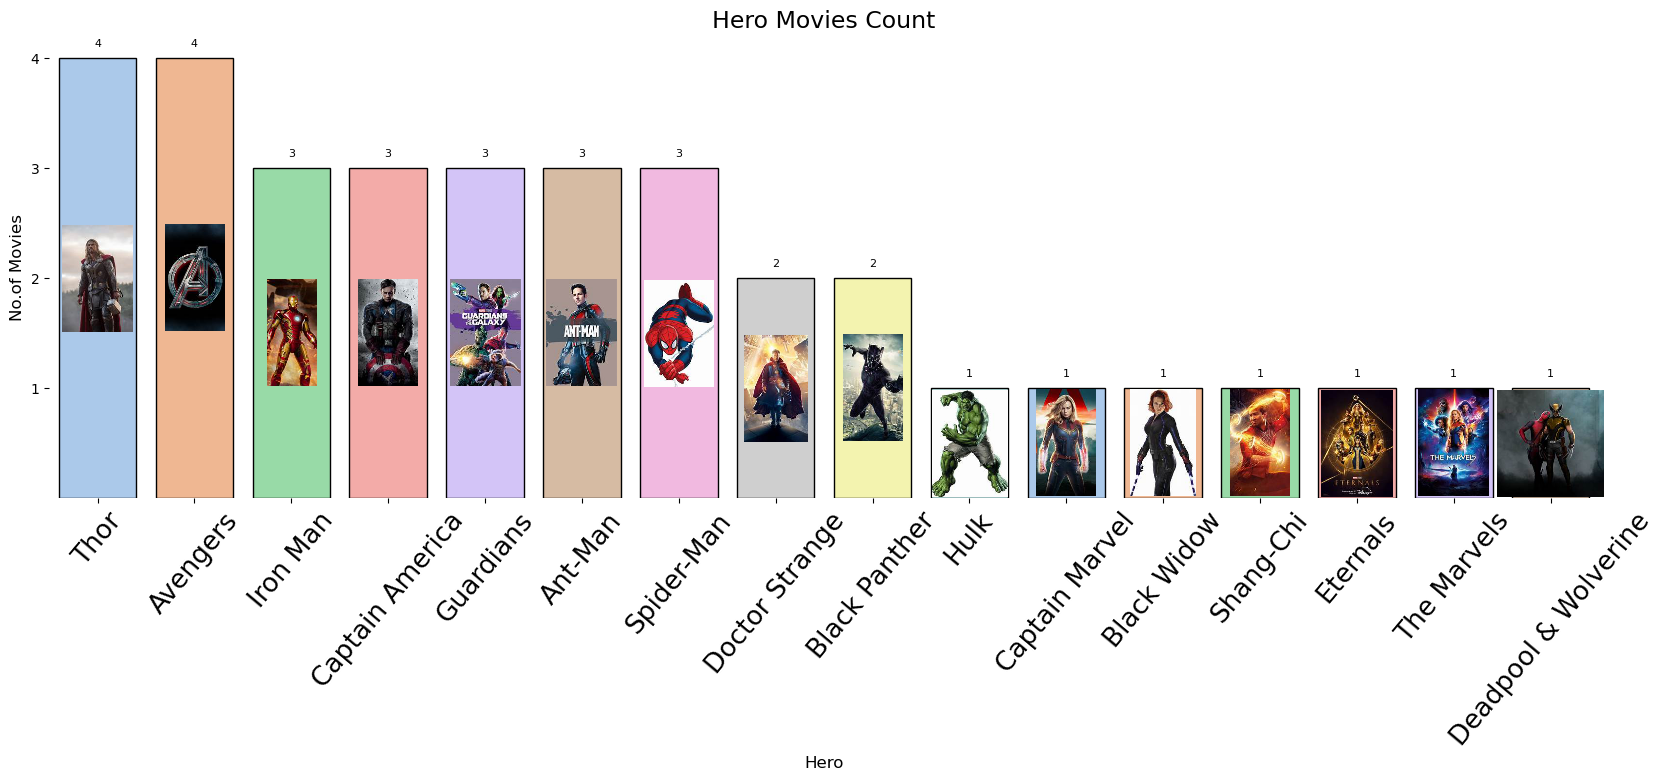

In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from io import BytesIO
from PIL import Image
hero_counts = m['Hero'].value_counts()
hero_images = {
    'Thor': 'https://tse4.mm.bing.net/th?id=OIP.NbDGsmX_RNvb7rl_8NV4nAHaLI&pid=Api&P=0&h=220',
    'Avengers': 'https://tse3.mm.bing.net/th?id=OIP.4iKzmg_u5wLXpWIsGasMagHaNL&pid=Api&P=0&h=220',
    'Iron Man': 'https://tse2.mm.bing.net/th?id=OIP.9GzEaWnh2r_Hg6dQOpknjQHaQD&pid=Api&P=0&h=220',
    'Captain America': 'https://tse4.mm.bing.net/th?id=OIP.MIe4biFMfOa-pZ6gGdsd3QHaNK&pid=Api&P=0&h=220',
    'Guardians': 'https://tse4.mm.bing.net/th?id=OIP.6J1FDrynbx8PEGTSJbwcpwHaLH&pid=Api&P=0&h=220',
    'Ant-Man': 'https://tse1.mm.bing.net/th?id=OIP.yiqhSTLWN6YDRresq2YQ5AHaLH&pid=Api&P=0&h=220',
    'Spider-Man': 'https://tse4.mm.bing.net/th?id=OIP.aaIaqSUknuDQl32LpKlsWAHaLc&pid=Api&P=0&h=220',
    'Doctor Strange': 'https://tse1.mm.bing.net/th?id=OIP.Fx3WnS2I1Jr09W8kqvqQmQHaMi&pid=Api&P=0&h=220',
    'Black Panther': 'https://tse3.mm.bing.net/th?id=OIP._iWJLWepSFOBnCElu7rGSgHaNK&pid=Api&P=0&h=220',
    'Hulk': 'https://tse3.mm.bing.net/th?id=OIP.fvRvVEIAhJvdpiZWcEuhRAHaKc&pid=Api&P=0&h=220',
    'Captain Marvel': 'https://tse3.mm.bing.net/th?id=OIP.UCh8q11nEIP5t6Go06XGPwHaNK&pid=Api&P=0&h=220',
    'Black Widow': 'https://tse2.mm.bing.net/th?id=OIP.0RW-Isi7Zp-fJPoeorg9LwHaL_&pid=Api&P=0&h=220',
    'Shang-Chi': 'https://tse3.mm.bing.net/th?id=OIP.i9POzUZ7GvhuHjJp3k6X4gHaNK&pid=Api&P=0&h=220',
    'Eternals': 'https://tse1.mm.bing.net/th?id=OIP.4KN-lwbtlBGNN4X7OmlP-gHaK-&pid=Api&P=0&h=220',
    'The Marvels': 'https://tse2.mm.bing.net/th?id=OIP.py3wmWvd2nj0De3QDPCzRAHaLH&pid=Api&P=0&h=220',
    'Deadpool & Wolverine': 'https://tse2.mm.bing.net/th?id=OIP.AEUj1fBYO9ASHGddENYugwHaHa&pid=Api&P=0&h=220'
}
def fetch_image_from_url(url):
    response=requests.get(url)
    img=Image.open(BytesIO(response.content))
    return img
def add_images_inside_bars(ax, x, y, images):
    for i,(xi, yi) in enumerate(zip(x, y)):
        img=fetch_image_from_url(images[i])
        imagebox=OffsetImage(img,zoom=0.35) #0.15
        ab=AnnotationBbox(imagebox,(xi,yi/2),frameon=False,box_alignment=(0.5,0.5))
        ax.add_artist(ab)
plt.figure(figsize=(20,6))
ax=sns.barplot(x=hero_counts.index,y=hero_counts.values,hue=hero_counts.index,palette='pastel',edgecolor='black',alpha=1)
x_coords=range(len(hero_counts.index))
y_coords=hero_counts.values
image_urls=[hero_images[hero] for hero in hero_counts.index]
add_images_inside_bars(ax,x_coords,y_coords,image_urls)
plt.title('Hero Movies Count',fontsize=17)
plt.xlabel('Hero',fontsize=12)
plt.ylabel('No.of Movies',fontsize=12)
plt.xticks(rotation=50,fontsize=19)
ax.set_yticks(range(int(min(hero_counts.values)),int(max(hero_counts.values))+1))
for i in range(len(x_coords)):
    ax.text(x_coords[i],y_coords[i]+ 0.1,str(int(y_coords[i])),ha='center',fontsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

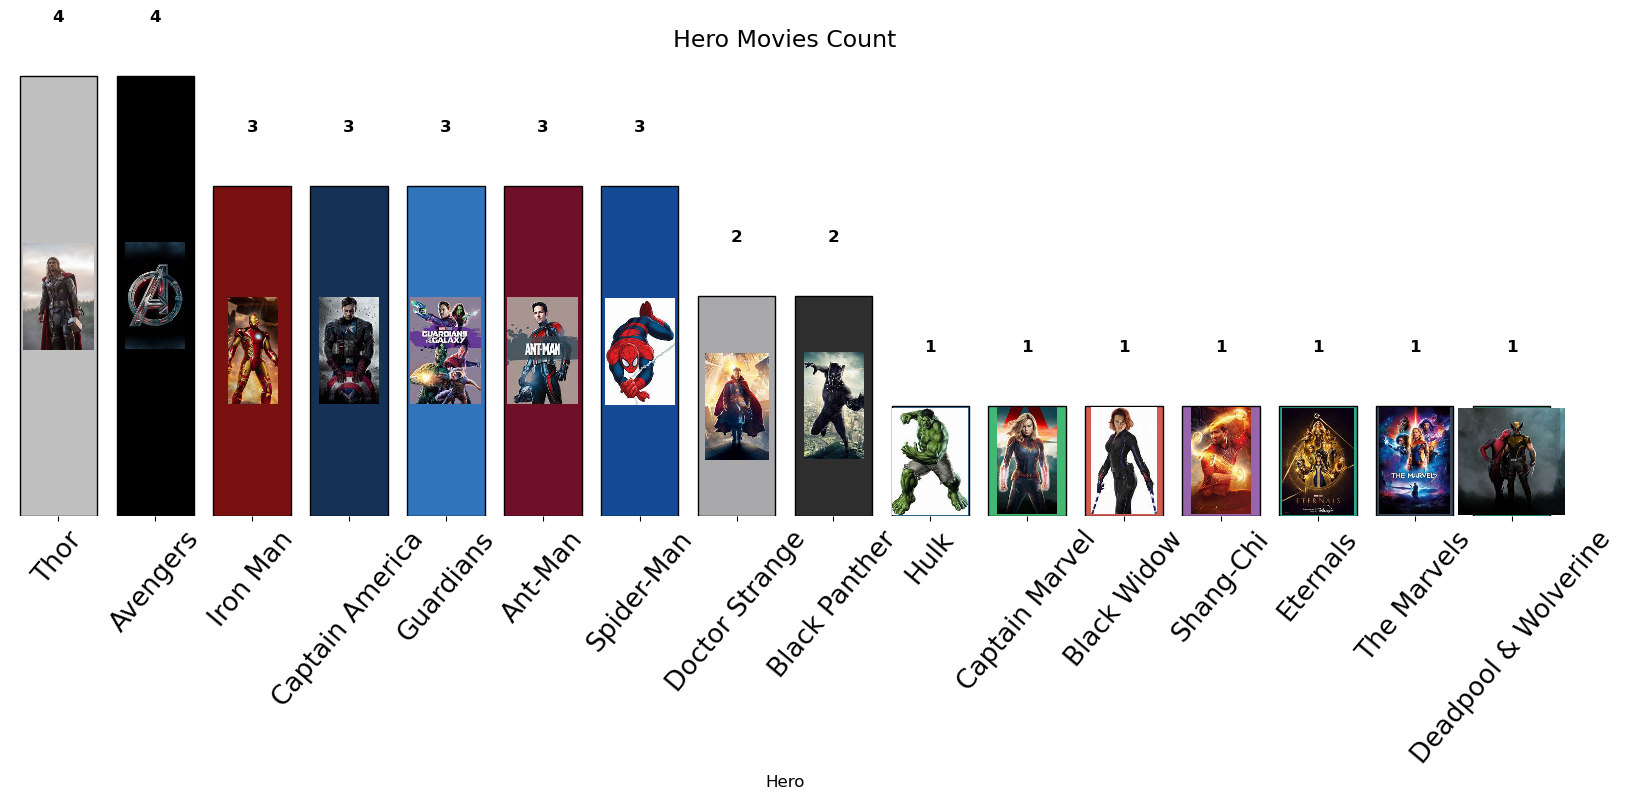

In [11]:
plt.figure(figsize=(20, 6))

# Define custom colors for each bar
custom_colors = ['#C0C0C0', '#000000', '#8B0000', '#0A3161', '#1974D2', '#800020', '#0047AB', '#A8A9AD', '#2E2E2E', '#2980B9', '#2ECC71', '#E74C3C', '#9B59B6', '#1ABC9C', '#34495E', '#16A085']

# Make sure the number of colors matches the number of bars
custom_colors = custom_colors[:len(hero_counts.index)]

ax = sns.barplot(x=hero_counts.index, y=hero_counts.values, hue=hero_counts.index, palette=custom_colors, edgecolor='black', alpha=1, dodge=False)

x_coords = range(len(hero_counts.index))
y_coords = hero_counts.values
image_urls = [hero_images[hero] for hero in hero_counts.index]

add_images_inside_bars(ax, x_coords, y_coords, image_urls)

plt.title('Hero Movies Count', fontsize=17)
plt.xlabel('Hero', fontsize=12)
plt.xticks(rotation=50, fontsize=19)

# Remove y-axis values
ax.set_yticks([])
ax.set_ylabel('')

# Add count on top of bars
for i in range(len(x_coords)):
    ax.text(x_coords[i], y_coords[i] + 0.5, str(int(y_coords[i])), ha='center', fontsize=12, fontweight='bold')

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()


## *➳ From April 14, 2008, to December 6, 2014-these are the battle stats of our heroes!.*

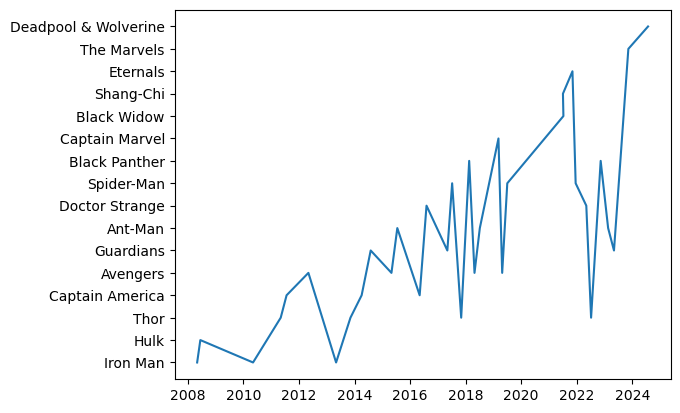

In [12]:
x=m['ReleaseDate(DD-MM-YYYY)']
y=m['Hero']
plt.plot(x,y)
plt.show()

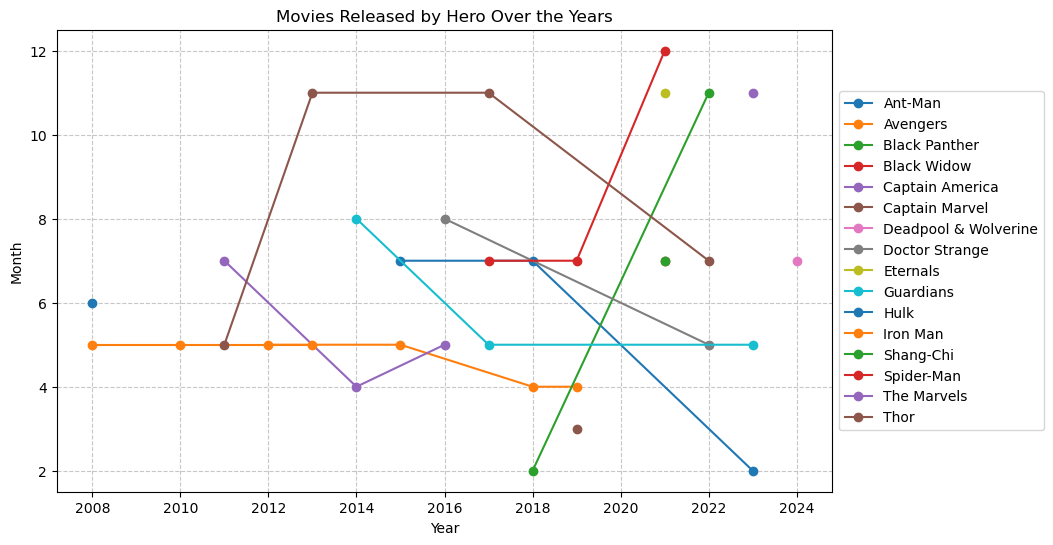

In [13]:
m['ReleaseDate(DD-MM-YYYY)']=pd.to_datetime(m['ReleaseDate(DD-MM-YYYY)'])
m['month']=m['ReleaseDate(DD-MM-YYYY)'].dt.month
m['Year']=m['ReleaseDate(DD-MM-YYYY)'].dt.year
plt.figure(figsize=(10,6))
for hero,group in m.groupby('Hero'):
    plt.plot(group['Year'],group['month'],marker='o',linestyle='-',label=hero)
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Movies Released by Hero Over the Years')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

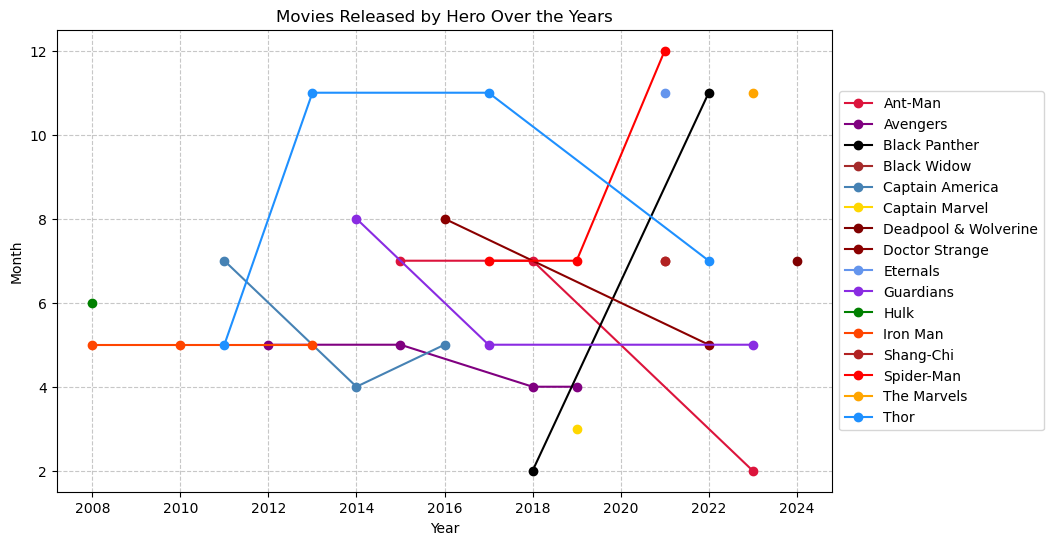

In [17]:
# The current graph has color inconsistencies, making it hard to differentiate between plots. To improve clarity, 
# we will assign unique colors to each element for better visualization.
m['ReleaseDate(DD-MM-YYYY)']=pd.to_datetime(m['ReleaseDate(DD-MM-YYYY)'])
m['month']=m['ReleaseDate(DD-MM-YYYY)'].dt.month
m['Year']=m['ReleaseDate(DD-MM-YYYY)'].dt.year
colors = {
    'Iron Man': '#FF4500',          # Vibrant red-orange, reflecting his red and gold suit
    'Hulk': '#008000',              # Classic green for his skin
    'Thor': '#1E90FF',              # Dodger blue for his Asgardian armor and lightning
    'Captain America': '#4682B4',   # Steel blue for his shield and uniform
    'Avengers': '#800080',          # Purple for their collective branding
    'Guardians': '#8A2BE2',         # Blue-violet, reflecting their cosmic themes
    'Ant-Man': '#DC143C',           # Crimson red, matching his suit
    'Doctor Strange': '#8B0000',    # Dark red for his cloak
    'Spider-Man': '#FF0000',        # Classic bright red for his suit
    'Black Panther': '#000000',     # Black for his vibranium suit
    'Captain Marvel': '#FFD700',    # Gold, symbolizing her cosmic energy
    'Black Widow': '#A52A2A',       # Dark red-brown for her assassin suit
    'Shang-Chi': '#B22222',         # Firebrick red, reflecting his martial arts uniform
    'Eternals': '#6495ED',          # Cornflower blue for their cosmic heritage
    'The Marvels': '#FFA500',       # Orange for their energy and synergy
    'Deadpool & Wolverine': '#800000'  # Maroon for Deadpool and Wolverine's dark tones
}
plt.figure(figsize=(10,6))

# Loop through each group (grouped by Hero) and plot with the corresponding color
for hero, group in m.groupby('Hero'):
    # Use the color from the dictionary, default to 'black' if hero not in the dictionary
    plt.plot(group['Year'], group['month'], marker='o', linestyle='-', label=hero, color=colors.get(hero, 'black'))

# Add labels, title, and grid
plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Movies Released by Hero Over the Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()
# given by chatgpt but it looks akward thats okay lets try to add our own colors for better visualization..😂😂

#### **Time to do some movie math! 🎬💰 Let's see how much they spent and how much they raked in—did they strike gold or go broke?**

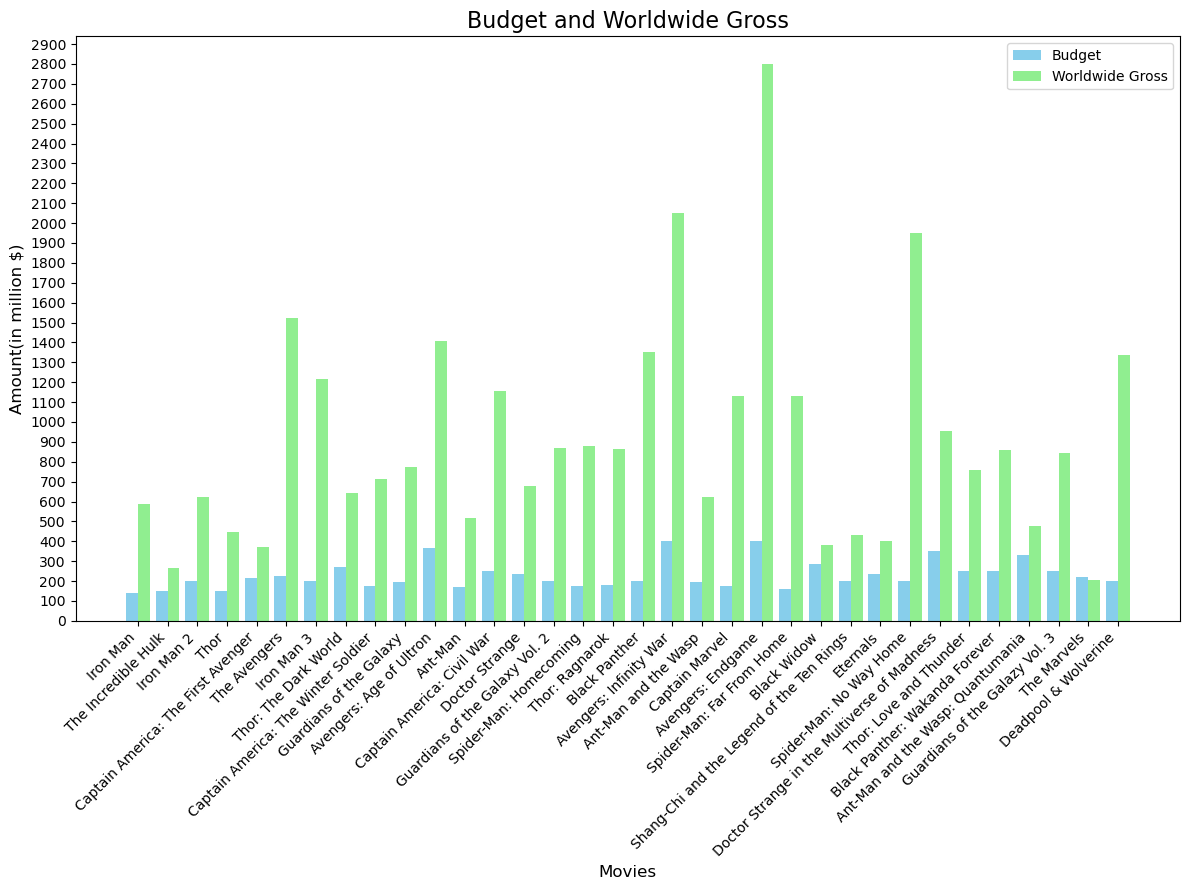

In [18]:
x_labels=m['Title']
x=np.arange(len(x_labels))
plt.figure(figsize=(12,9))
bar_width=0.4
benifit=np.arange(0,3000,100)
plt.yticks(ticks=benifit,fontsize=10)
plt.bar(x-bar_width/2,m['Budget(inmillion$)'],width=bar_width,label='Budget',color='skyblue')
plt.bar(x+bar_width/2,m['WorldwideGross(inmillion$)'],width=bar_width,label='Worldwide Gross',color='lightgreen')
plt.title("Budget and Worldwide Gross",fontsize=16)
plt.xlabel("Movies",fontsize=12)
plt.ylabel("Amount(in million $)",fontsize=12)
plt.xticks(x,x_labels,rotation=45,ha='right')
plt.legend()
plt.tight_layout()
plt.show()

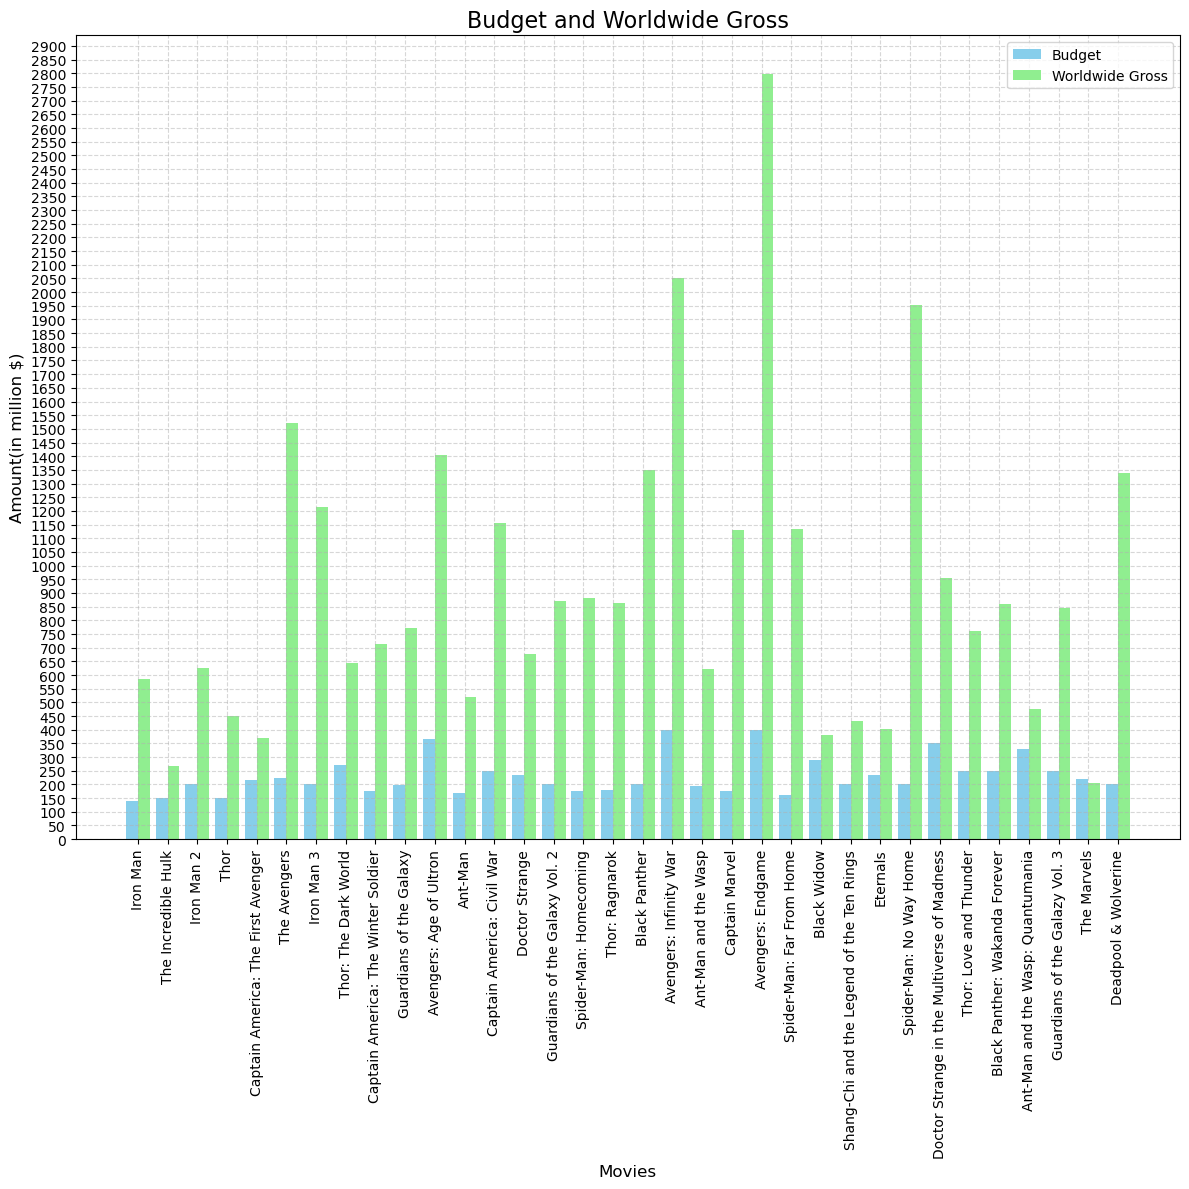

In [20]:
x_labels=m['Title']
x=np.arange(len(x_labels))
plt.figure(figsize=(12,12))
bar_width=0.4
benifit=np.arange(0,3000,50)
plt.yticks(ticks=benifit,fontsize=10)
plt.bar(x-bar_width/2,m['Budget(inmillion$)'],width=bar_width,label='Budget',color='skyblue')
plt.bar(x+bar_width/2,m['WorldwideGross(inmillion$)'],width=bar_width,label='Worldwide Gross',color='lightgreen')
plt.title("Budget and Worldwide Gross",fontsize=16)
plt.xlabel("Movies",fontsize=12)
plt.ylabel("Amount(in million $)",fontsize=12)
plt.xticks(x,x_labels,rotation=90,ha='center')
plt.grid(True,linestyle='--',alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

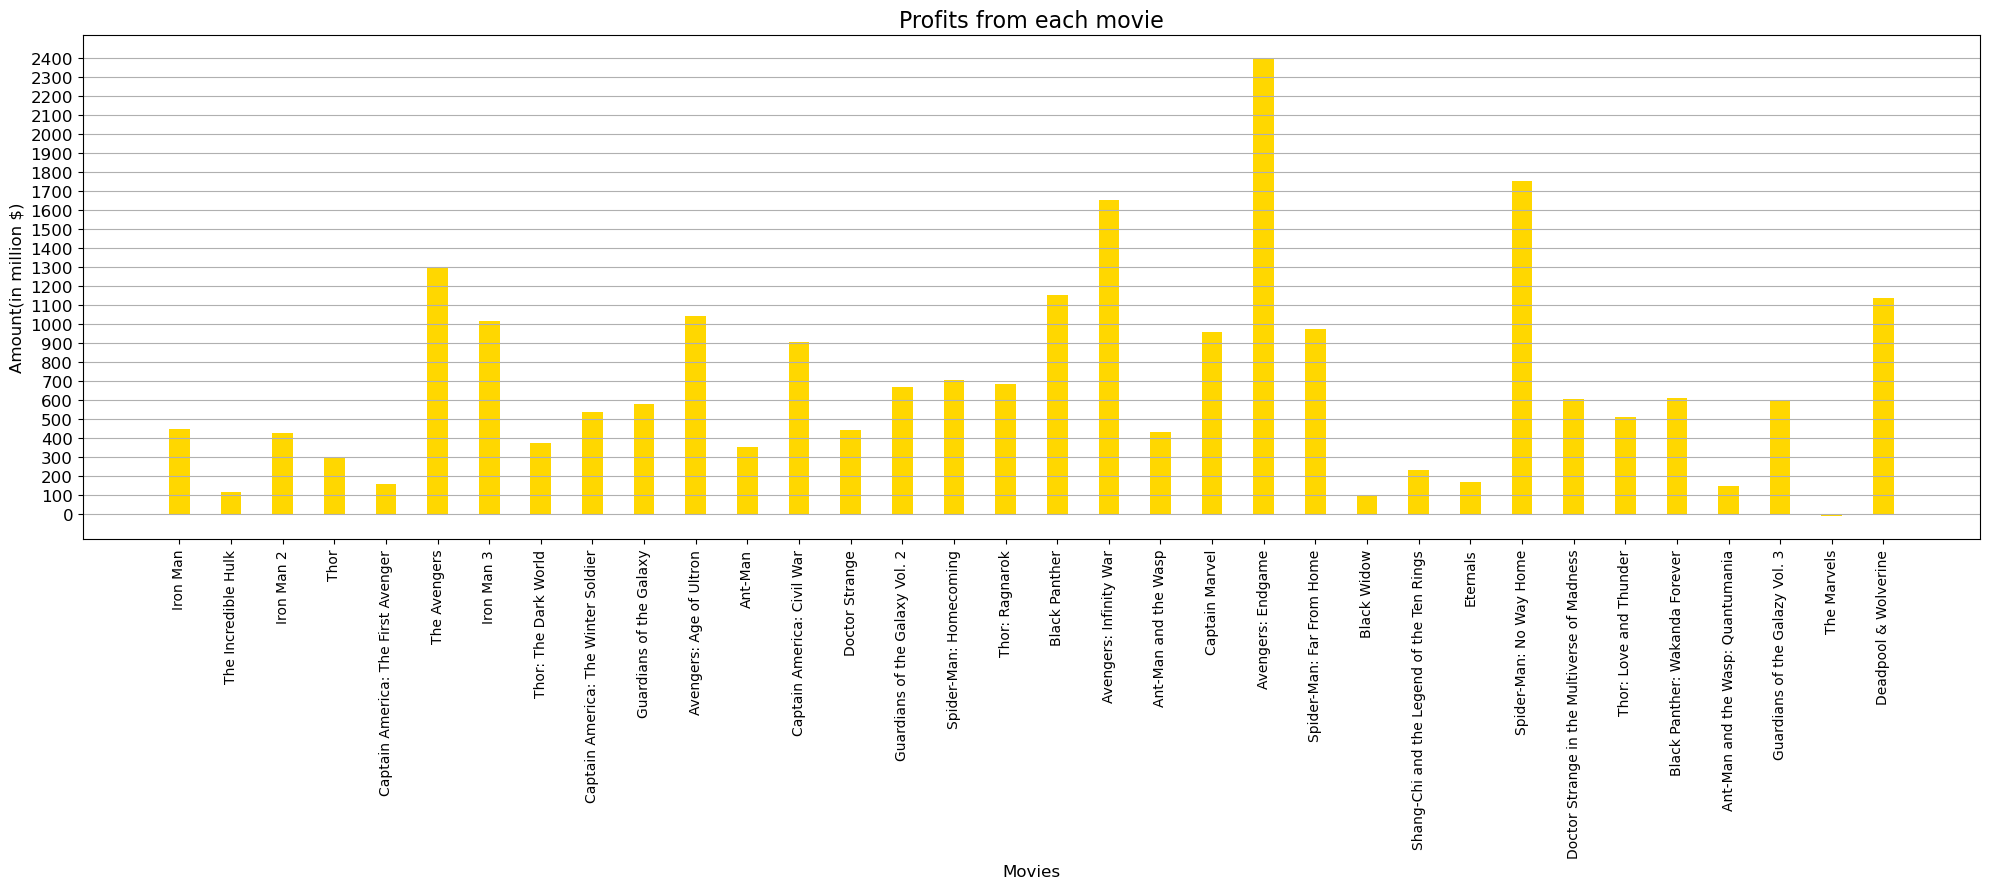

In [21]:
# Whoa, the worldwide gross is off the charts! 🌍💰 Let's cut through the hype 
# and check the real deal—how much profit did they actually make?" 
m['profit']=m['WorldwideGross(inmillion$)']-m['Budget(inmillion$)']
x_labels=m['Title']
benifit=np.arange(0,2500,100)
plt.figure(figsize=(20,9))
plt.bar(x_labels,m['profit'],width=0.4,color='gold')
plt.xticks(rotation=90,ha="center")
plt.yticks(ticks=benifit,fontsize=12)
plt.title("Profits from each movie",fontsize=16)
plt.xlabel("Movies",fontsize=12)
plt.ylabel("Amount(in million $)",fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

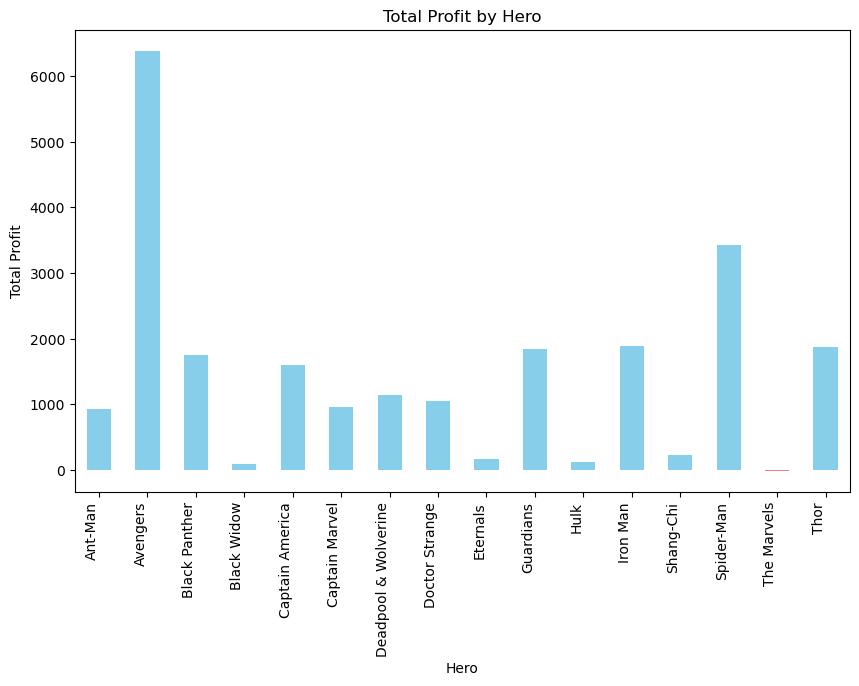

In [23]:
# Time to see which hero is the real box office king!
profitbyhero=m.groupby('Hero')['profit'].sum()
colors = ['skyblue' if value >= 0 else 'lightcoral' for value in profitbyhero]
plt.figure(figsize=(10,6))
profitbyhero.plot(kind='bar',color=colors)
plt.title('Total Profit by Hero')
plt.xlabel('Hero')
plt.ylabel('Total Profit')
plt.xticks(rotation=90,ha='right')
#plt.grid(axis='y')
plt.show()

In [24]:
negativecollections=profitbyhero[profitbyhero<0]
negativecollections

Hero
The Marvels   -13.7
Name: profit, dtype: float64

## **The bts of "The Marvels"**
###### **Marvel: "We’re about to drop a blockbuster!"**
###### **Box Office: "Nah fam, hold this -$13.7M instead.**"
###### This movie didn’t just flop—it pulled a full-on reverse heist! 😂
######  A squad of badass women fought for this, but the audience treated it like a Windows update—ignored it till it was forced on them. 💀💀
###### Kevin Feige gotta be in a dark room whispering, ‘We are in the Endgame now…’ 😭 Someone call Iron Man back from the grave—Marvel needs a RESCUE MISSION ASAP! 🚨😂

#### **Let's analyze the 'Directors' column to explore their contributions and trends—after all, they have truly rocked the movies!**

In [26]:
directors=m[(m['Director(1)'].notna())&(m['Director(2)'].notna())]
director=m[(m['Director(1)'].notna())&(m['Director(2)'].isna())]

In [28]:
one_director=m.groupby('Director(1)')['profit'].sum()
two_director=m.groupby('Director(2)')['profit'].sum()
print("Average Profit(One Director):",one_director)
print("Average Profit(Two Directors):",two_director)

Average Profit(One Director): Director(1)
Alan Taylor               372.8
Anna Boden                956.0
Anthony Russo            5493.4
Cate Shortland             91.8
Chloe Zhao                166.1
Destin Daniel Cretton     232.2
James Gunn               1842.0
Joe Johnston              155.6
Jon Favreau               869.7
Jon Watts                3430.9
Joss Whedon              2336.0
Kenneth Branagh           299.3
Louis Leterrier           115.5
Nia DaCosta               -13.7
Peyton Reed               924.1
Ryan Coogler             1759.2
Sam Raimi                 605.8
Scott Derrickson          441.8
Shane Black              1015.0
Shawn Levy               1138.0
Taika Waititi            1195.9
Name: profit, dtype: float64
Average Profit(Two Directors): Director(2)
Joe Russo     5493.4
Ryan Fleck     956.0
Name: profit, dtype: float64


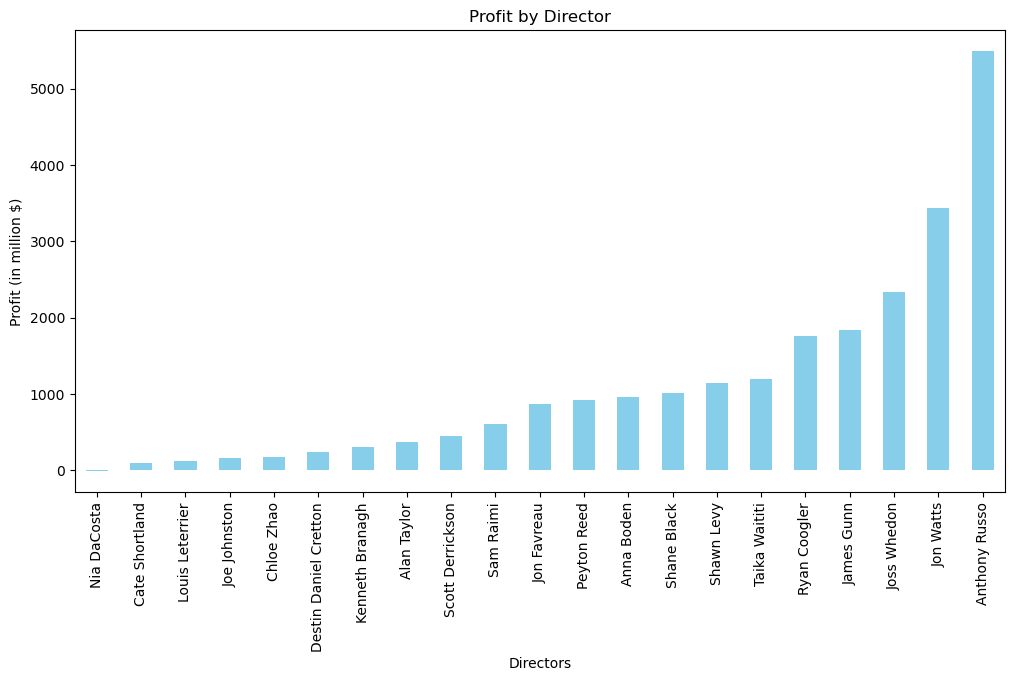

In [31]:
# Visualizing the profit made by each director—who’s cashing in and who’s crashing out?
director_profit=m.groupby('Director(1)')[['WorldwideGross(inmillion$)','Budget(inmillion$)']].sum()
director_profit['Profit']= director_profit['WorldwideGross(inmillion$)'] -director_profit['Budget(inmillion$)']
director_profit['Profit'].sort_values().plot(kind='bar',figsize=(12,6),color='skyblue')
plt.title('Profit by Director')
plt.ylabel('Profit (in million $)')
plt.xlabel('Directors')
plt.show()

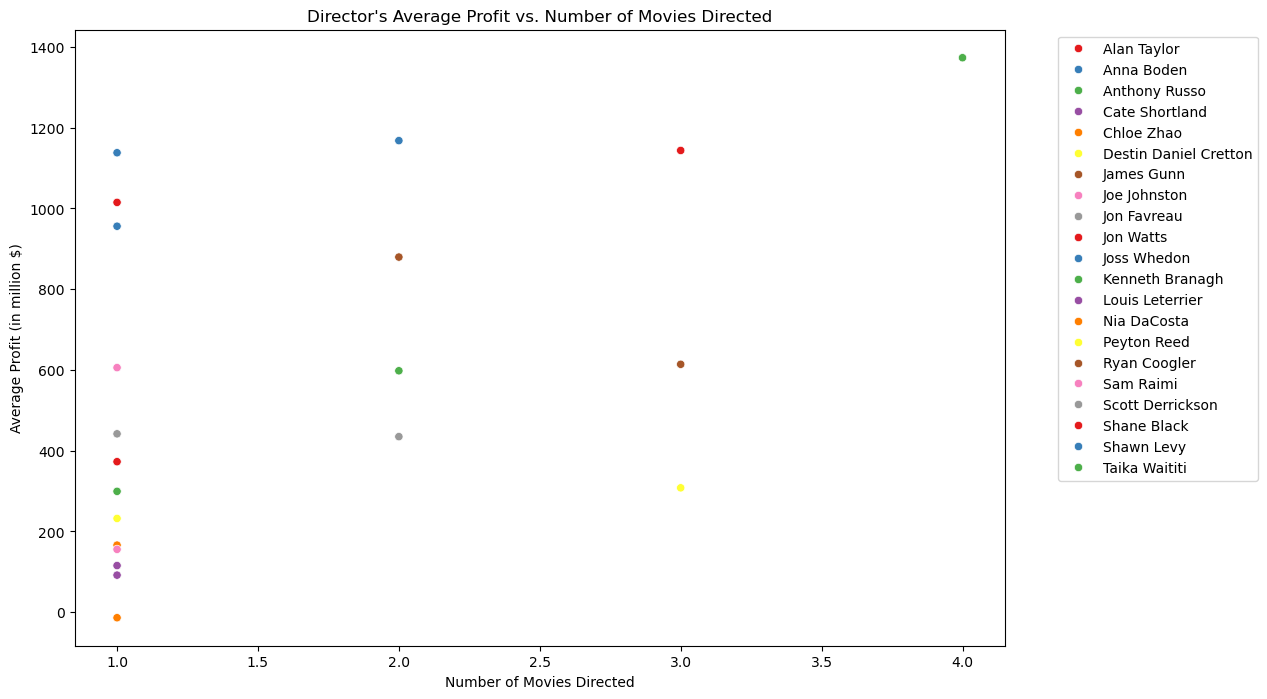

In [103]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=m.groupby('Director(1)')['profit'].mean().reset_index()
                .merge(m['Director(1)'].value_counts().reset_index()
                       .rename(columns={'index':'Director(1)','Director(1)':'Number of Movies'}),
                       on='Director(1)'),
                x='Number of Movies',y='profit',hue='Director(1)',palette='Set1')
plt.title("Director's Average Profit vs. Number of Movies Directed")
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Profit (in million $)')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()

In [35]:
one_director=director['WorldwideGross(inmillion$)'].sum()
two_directors=directors['WorldwideGross(inmillion$)'].sum()
one_director_count=director['Title'].nunique()
two_directors_count=directors['Title'].nunique()
average_profit_one_director=one_director/one_director_count
average_profit_two_directors=two_directors/two_directors_count
print("Total Profit(One Director):",one_director)
print("Total Profit(Two Directors):",two_directors)
print("Average Profit per Movie(One Director):",average_profit_one_director)
print("Average Profit per Movie(Two Directors):",average_profit_two_directors)
if 'Budget(inmillion$)' in director.columns and 'Budget(inmillion$)' in directors.columns:
    total_budget_one_director=director['Budget(inmillion$)'].sum()
    total_budget_two_directors=directors['Budget(inmillion$)'].sum()
    profit_percentage_one_director=(one_director/total_budget_one_director)*100
    profit_percentage_two_directors=(two_directors/total_budget_two_directors)*100
    print("Profit as % of Budget(One Director): {:.2f}%".format(profit_percentage_one_director))
    print("Profit as % of Budget(Two Directors): {:.2f}%".format(profit_percentage_two_directors))

Total Profit(One Director): 23379.799999999992
Total Profit(Two Directors): 7851.4
Average Profit per Movie(One Director): 806.1999999999997
Average Profit per Movie(Two Directors): 1570.28
Profit as % of Budget(One Director): 365.21%
Profit as % of Budget(Two Directors): 560.01%


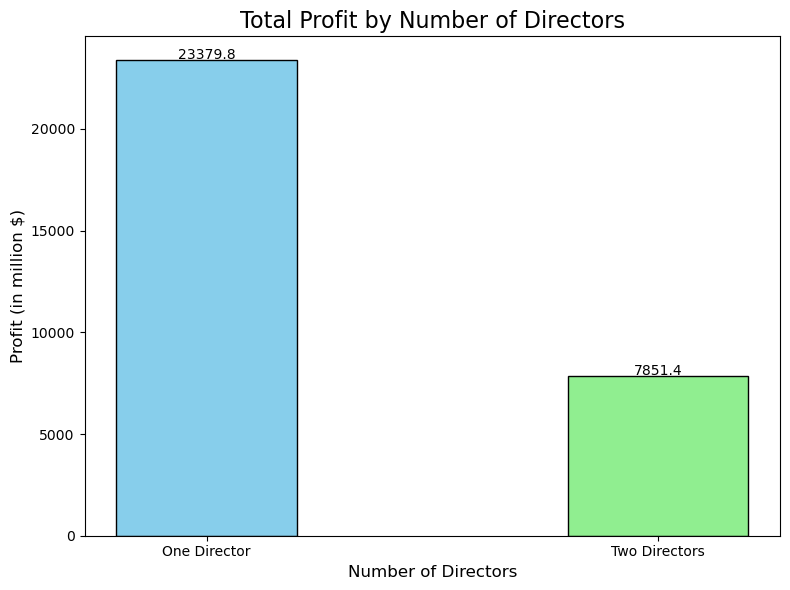

In [36]:
categories=['One Director','Two Directors']
total_profits=[one_director,two_directors]
plt.figure(figsize=(8,6))
bar_width=0.4
x=np.arange(len(categories))
plt.bar(x,total_profits,width=bar_width,color=['skyblue','lightgreen'],edgecolor='black')
plt.title('Total Profit by Number of Directors',fontsize=16)
plt.xlabel('Number of Directors',fontsize=12)
plt.ylabel('Profit (in million $)',fontsize=12)
plt.xticks(x,categories,fontsize=10)
plt.yticks(fontsize=10)
for i,profit in enumerate(total_profits):
    plt.text(i,profit+50,f'{profit:.1f}',ha='center',fontsize=10,color='black')
plt.tight_layout()
plt.show()

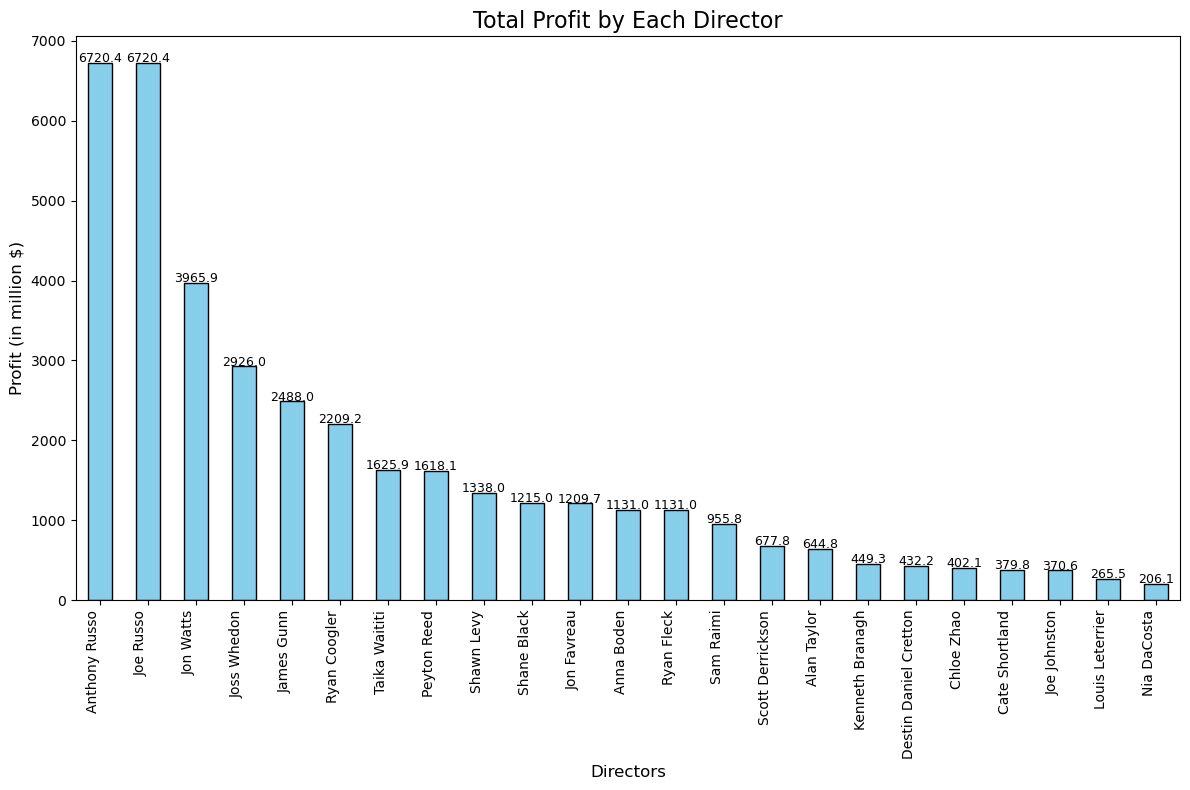

In [38]:
directors=pd.concat([
    m[['Director(1)','WorldwideGross(inmillion$)']].rename(columns={'Director(1)':'Director'}),
    m[['Director(2)','WorldwideGross(inmillion$)']].rename(columns={'Director(2)':'Director'})
])
directors=directors.dropna(subset=['Director'])
director_profits=directors.groupby('Director')['WorldwideGross(inmillion$)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
director_profits.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Total Profit by Each Director',fontsize=16)
plt.xlabel('Directors',fontsize=12)
plt.ylabel('Profit (in million $)',fontsize=12)
plt.xticks(rotation=90, ha='right',fontsize=10)
plt.yticks(fontsize=10)
for i,profit in enumerate(director_profits):
    plt.text(i,profit+10,f'{profit:.1f}',ha='center',fontsize=9,color='black')
plt.tight_layout()
plt.show()

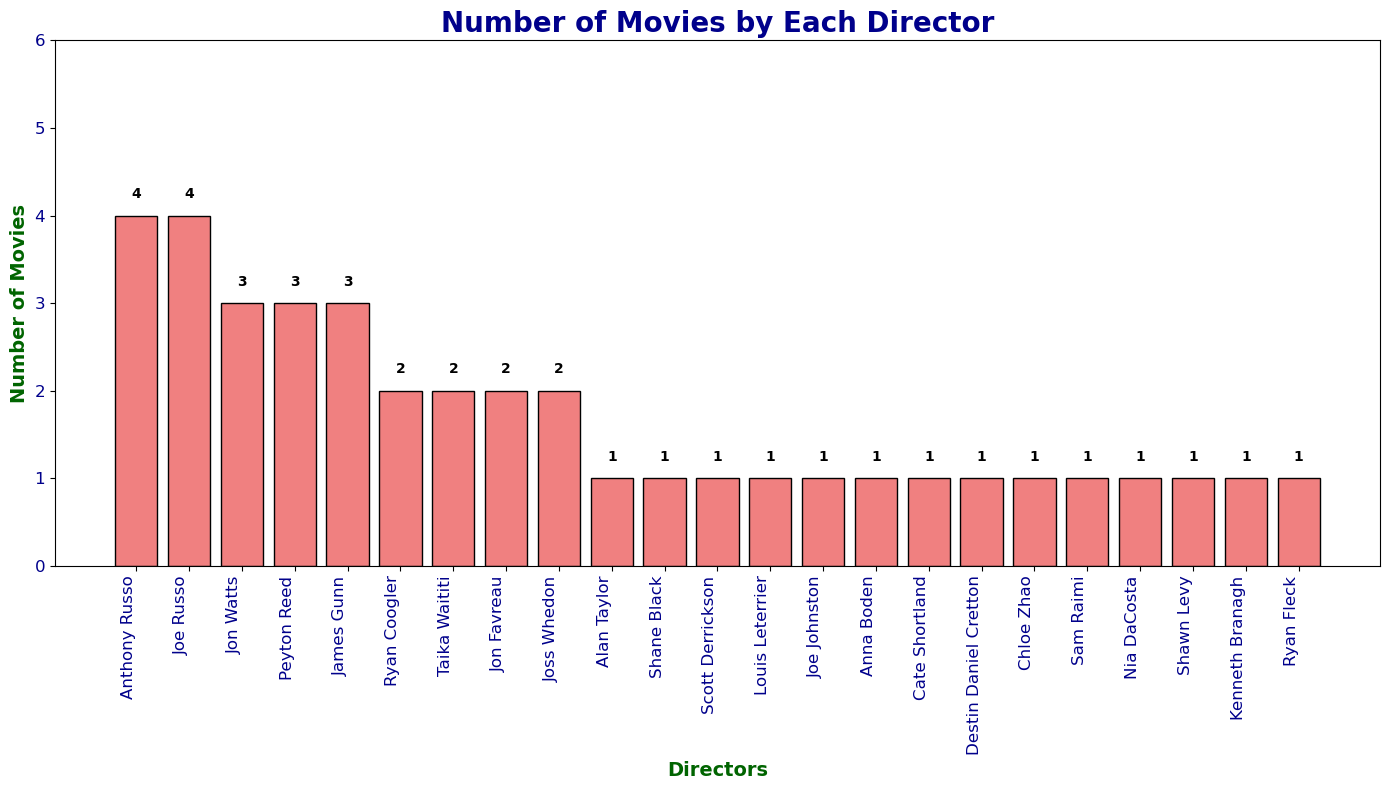

In [41]:
all_directors=pd.concat([m['Director(1)'],m['Director(2)']]).dropna()
director_counts=all_directors.value_counts()
plt.figure(figsize=(14,8))
bars=plt.bar(director_counts.index,director_counts.values,color='lightcoral',edgecolor='black')
plt.ylim(0, max(director_counts.values)+2)
plt.title('Number of Movies by Each Director',fontsize=20,fontweight='bold',color='darkblue')
plt.xlabel('Directors',fontsize=14,fontweight='bold',color='darkgreen')
plt.ylabel('Number of Movies',fontsize=14,fontweight='bold',color='darkgreen')
plt.xticks(rotation=90,ha='right',fontsize=12,color='darkblue')
plt.yticks(fontsize=12,color='darkblue')
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.2,f'{int(bar.get_height())}', ha='center', fontsize=10, color='black', fontweight='bold')
plt.tight_layout()
plt.show()

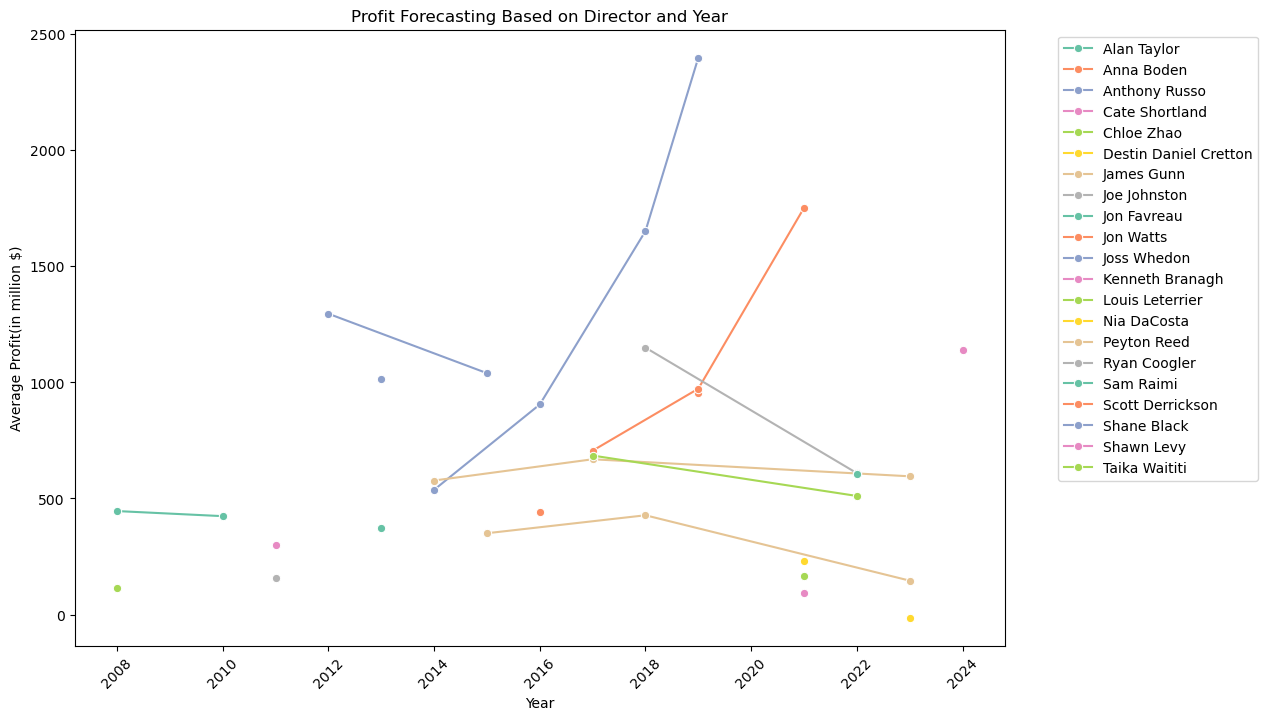

In [98]:
directors_profit=m.groupby(['Director(1)','Year'])['profit'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=directors_profit,x='Year',y='profit',hue='Director(1)',marker='o',palette='Set2')
plt.title('Profit Forecasting Based on Director and Year')
plt.xlabel('Year')
plt.ylabel('Average Profit(in million $)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

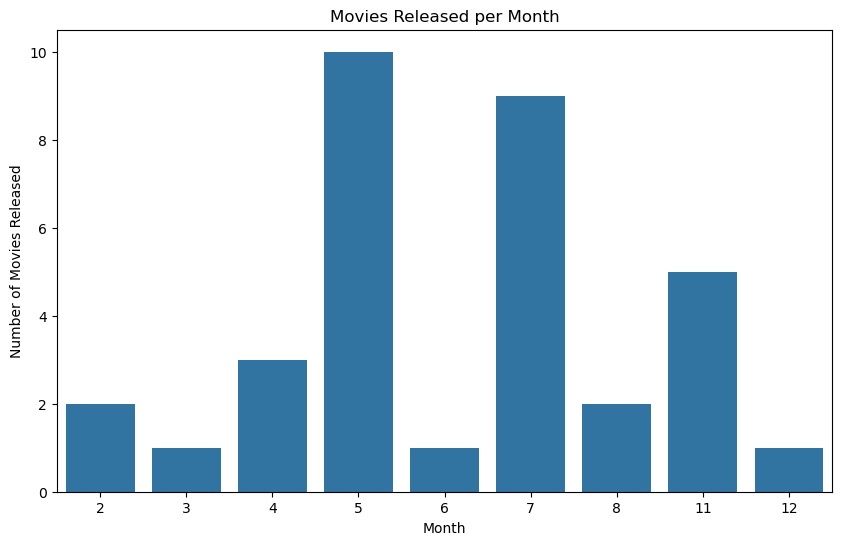

In [87]:
monthly_releases=m['month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_releases.index,y=monthly_releases.values)
plt.title('Movies Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.show()

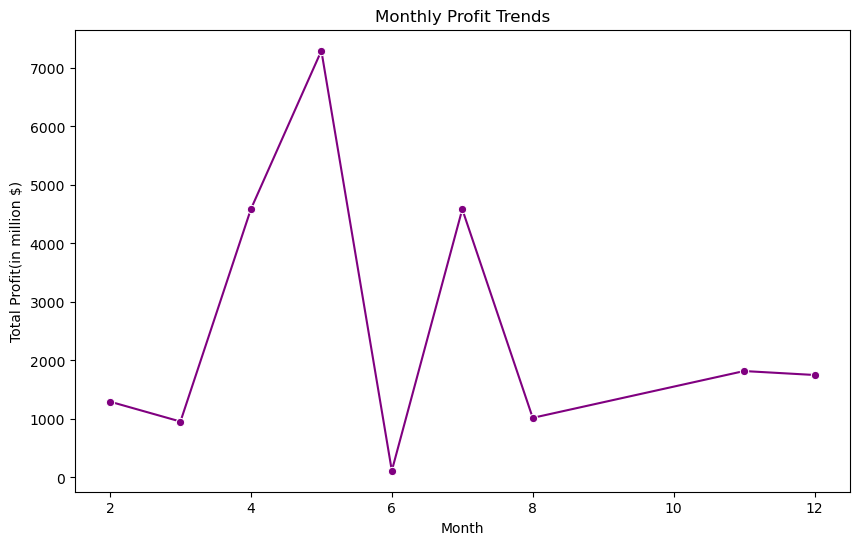

In [83]:
monthly_profit = m.groupby('month')['profit'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_profit,x='month',y='profit',color='purple',marker='o')
plt.title('Monthly Profit Trends')
plt.xlabel('Month')
plt.ylabel('Total Profit(in million $)')
plt.show()

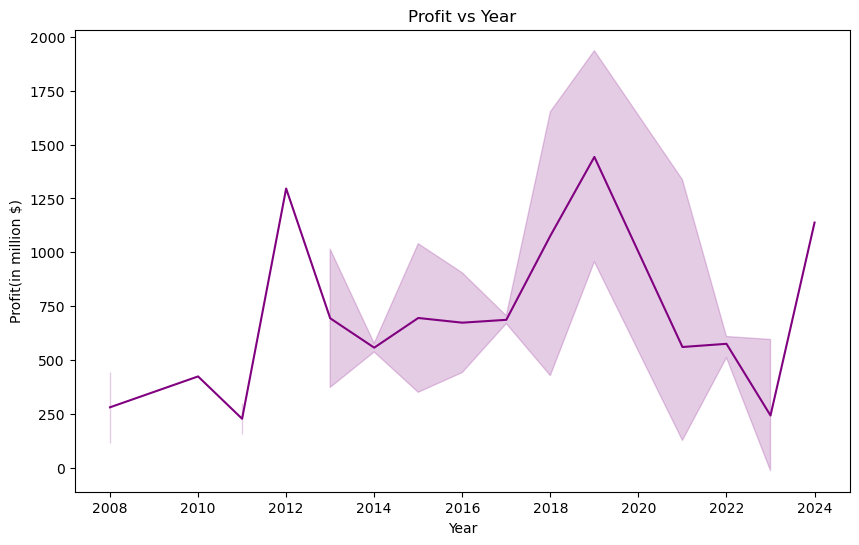

In [74]:
plt.figure(figsize=(10,6))
sns.lineplot(data=m,x='Year',y='profit',color='purple')
plt.title('Profit vs Year')
plt.xlabel('Year')
plt.ylabel('Profit(in million $)')
plt.show()

In [43]:
# Main directors in action!Extracting all primary directors who led the charge.
m['Director(1)'][m['Director(1)'].notna()]

0               Jon Favreau
1           Louis Leterrier
2               Jon Favreau
3           Kenneth Branagh
4              Joe Johnston
5               Joss Whedon
6               Shane Black
7               Alan Taylor
8             Anthony Russo
9                James Gunn
10              Joss Whedon
11              Peyton Reed
12            Anthony Russo
13         Scott Derrickson
14               James Gunn
15                Jon Watts
16            Taika Waititi
17             Ryan Coogler
18            Anthony Russo
19              Peyton Reed
20               Anna Boden
21            Anthony Russo
22                Jon Watts
23           Cate Shortland
24    Destin Daniel Cretton
25               Chloe Zhao
26                Jon Watts
27                Sam Raimi
28            Taika Waititi
29             Ryan Coogler
30              Peyton Reed
31               James Gunn
32              Nia DaCosta
33               Shawn Levy
Name: Director(1), dtype: object

In [42]:
# Spotlight on the supporting directors!Extracting all secondary directors who contributed behind the scenes.
m['Director(2)'][m['Director(2)'].notna()]

8      Joe Russo
12     Joe Russo
18     Joe Russo
20    Ryan Fleck
21     Joe Russo
Name: Director(2), dtype: object

In [45]:
# Double the directors, double the drama!👀 Let's check out the movies with multiple directors.
m[m['Director(2)']=='Ryan Fleck']

,Title,Hero,Director(1),Director(2),ReleaseDate(DD-MM-YYYY),IMDb(scoredoutof10),IMDBMetascore(scoredoutof100),RottenTomatoes-Critics(scoredoutof100%),RottenTomatoes-Audience(scoredoutof100%),Letterboxd(scoredoutof5),CinemaScore(gradesA+toF),Budget(inmillion$),DomesticGross(inmillion$),WorldwideGross(inmillion$),month,Year,profit
20,Captain Marvel,Captain Marvel,Anna Boden,Ryan Fleck,2019-03-08,6.8,64,79,45,2.7,A,175.0,426.8,1131.0,3,2019,956.0


In [46]:
m[m['Director(2)']=='Joe Russo']

,Title,Hero,Director(1),Director(2),ReleaseDate(DD-MM-YYYY),IMDb(scoredoutof10),IMDBMetascore(scoredoutof100),RottenTomatoes-Critics(scoredoutof100%),RottenTomatoes-Audience(scoredoutof100%),Letterboxd(scoredoutof5),CinemaScore(gradesA+toF),Budget(inmillion$),DomesticGross(inmillion$),WorldwideGross(inmillion$),month,Year,profit
8,Captain America: The Winter Soldier,Captain America,Anthony Russo,Joe Russo,2014-04-04,7.7,70,90,92,3.7,A,177.0,259.8,714.4,4,2014,537.4
12,Captain America: Civil War,Captain America,Anthony Russo,Joe Russo,2016-05-06,7.8,75,90,89,3.6,A,250.0,408.1,1155.0,5,2016,905.0
18,Avengers: Infinity War,Avengers,Anthony Russo,Joe Russo,2018-04-27,8.4,68,85,92,4.0,A,400.0,678.8,2052.0,4,2018,1652.0
21,Avengers: Endgame,Avengers,Anthony Russo,Joe Russo,2019-04-26,8.4,78,94,90,3.9,A+,400.0,858.4,2799.0,4,2019,2399.0


### 🎬 Movies with Multiple Directors  
###### Well, there are **4 movies** with two directors—one of them is *Captain Marvel*, and the rest are *Avengers* films!

## ⭐Unveiling the Ratings!  
##### Let’s check out how these movies scored—box office hits or epic flops?

###### **Let's Source Some Insights on Ratings!**

In [47]:
# IMDb (scored out of 10)
# What it says: Audience-driven rating on a 10-point scale.
# Interpretation:
# 8+: Widely loved, must-watch.
# 7-8: Generally liked, solid movie.
# 6-7: Mixed reviews, watchable.
# <6: Below average, often criticized.

# IMDB Metascore (scored out of 100)
# What it says: Critics’ aggregated rating.
# Interpretation:
# 80+: Critically acclaimed, high quality.
# 60-80: Mixed-positive reviews.
# <60: Critically underwhelming or polarizing.

# Rotten Tomatoes Critics (scored out of 100%)
# What it says: Percentage of positive reviews from certified critics.
# Interpretation:
# 90%+: Universally praised, a critical favorite.
# 70-90%: Well-received by critics.

# Rotten Tomatoes Audience (scored out of 100%)
# What it says: Percentage of positive reviews from general viewers.
# Interpretation:
# 90%+: Loved by audiences, a crowd-pleaser.
# 70-90%: Generally enjoyed.
# <70%: Divisive or underwhelming for viewers.

# Letterboxd (scored out of 5)
# What it says: Cinephile and movie enthusiast rating.
# Interpretation:
# 4+: Outstanding, widely admired by film lovers.
# 3-4: Good but not exceptional.
# <3: Mediocre or niche appeal.

# CinemaScore (grades A+ to F)
# What it says: Audience satisfaction right after watching the movie.
# Interpretation:
# A+: Exceptional; universally loved.
# A to B+: Positive; well-received.
# B and below: Mixed or underwhelming.
# F: Total rejection; rare and often polarizing.

In [48]:
def imdb_rating(rating):
    if rating>=8:
        return "Super Hit"
    elif 7<=rating<8:
        return "A good movie"
    elif 6<=rating<7:
        return "Okay,okay"
    else:
        return "Gone for Good"
def imdb_metascore(score):
    if score>=80:
        return "Critically acclaimed,high quality"
    elif 60<=score<80:
        return "Mixed positive reviews"
    else:
        return "Critically underwhelming or polarizing"
def rotten_tomatoes_critics_score(score):
    if score>=90:
        return "Universally praised,a critical favorite"
    elif 70<=score<90:
        return "Well received by critics"
    else:
        return "Mixed or negative reviews"
def rotten_tomatoes_audience_score(score):
    if score>=90:
        return "Blast"
    elif 70<=score<90:
        return "One time watch"
    else:
        return "Waste of money"
def letterboxd_rating(score):
    if score>=4:
        return "Outstanding,widely admired by film lovers"
    elif 3<=score<4:
        return "Good but not exceptional"
    else:
        return "Mediocre or niche appeal"
def cinemascore(grade):
    if grade=="A+":
        return "Excellent"
    elif grade in ["A","A-"]:
        return "Good Story"
    elif grade in ["B+","B","B-"]:
        return "Nice Climax"
    elif grade in ["C+","C","C-"]:
        return "Story line is okay"
    elif grade in ["D+","D","D-","F"]:
        return "Is this a movie!"
    else:
        return "Invalid grade"

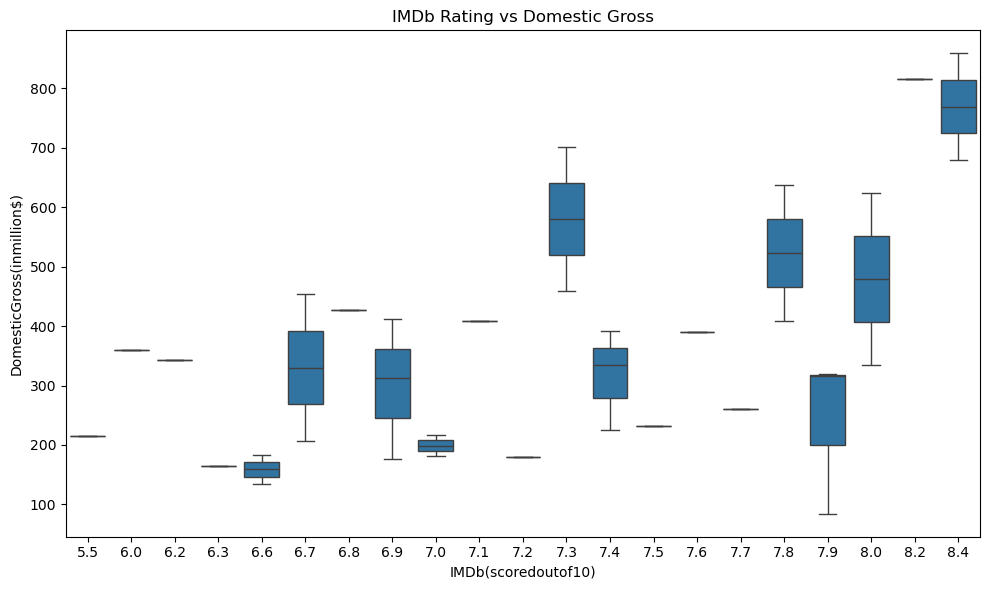

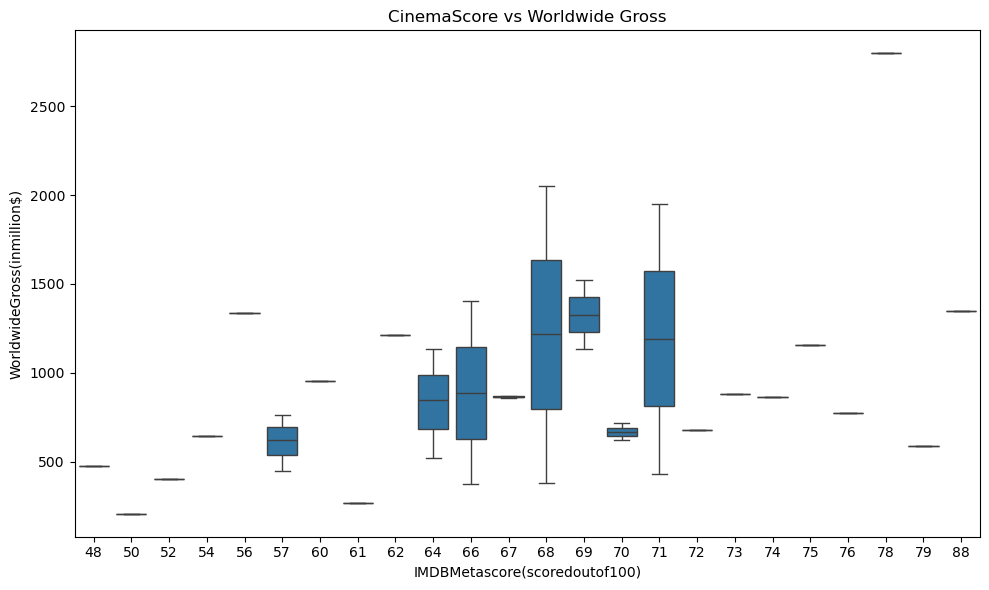

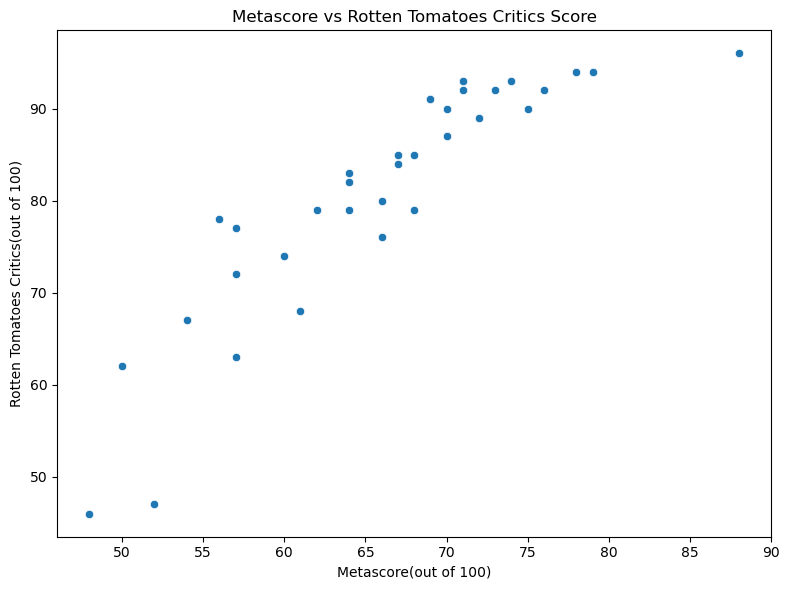

In [62]:
plt.figure(figsize=(10,6))
sns.boxplot(data=m,x='IMDb(scoredoutof10)',y='DomesticGross(inmillion$)')
plt.title("IMDb Rating vs Domestic Gross")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=m,x='IMDBMetascore(scoredoutof100)',y='WorldwideGross(inmillion$)')
plt.title("CinemaScore vs Worldwide Gross")
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=m['IMDBMetascore(scoredoutof100)'],y=m['RottenTomatoes-Critics(scoredoutof100%)'])
plt.title("Metascore vs Rotten Tomatoes Critics Score")
plt.xlabel("Metascore(out of 100)")
plt.ylabel("Rotten Tomatoes Critics(out of 100)")
plt.tight_layout()
plt.show()

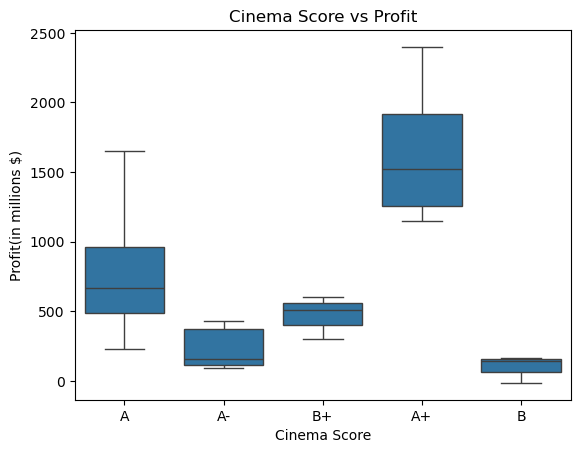

In [65]:
sns.boxplot(x=m['CinemaScore(gradesA+toF)'],y=m['profit'])
plt.title("Cinema Score vs Profit")
plt.xlabel("Cinema Score")
plt.ylabel("Profit(in millions $)")
plt.show()

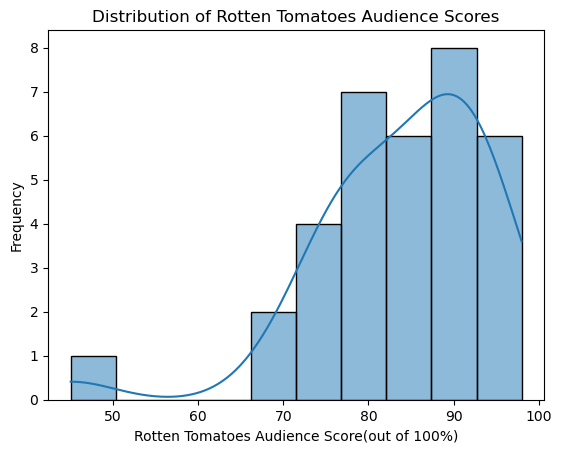

In [66]:
sns.histplot(m['RottenTomatoes-Audience(scoredoutof100%)'],kde=True, bins=10)
plt.title("Distribution of Rotten Tomatoes Audience Scores")
plt.xlabel("Rotten Tomatoes Audience Score(out of 100%)")
plt.ylabel("Frequency")
plt.show()

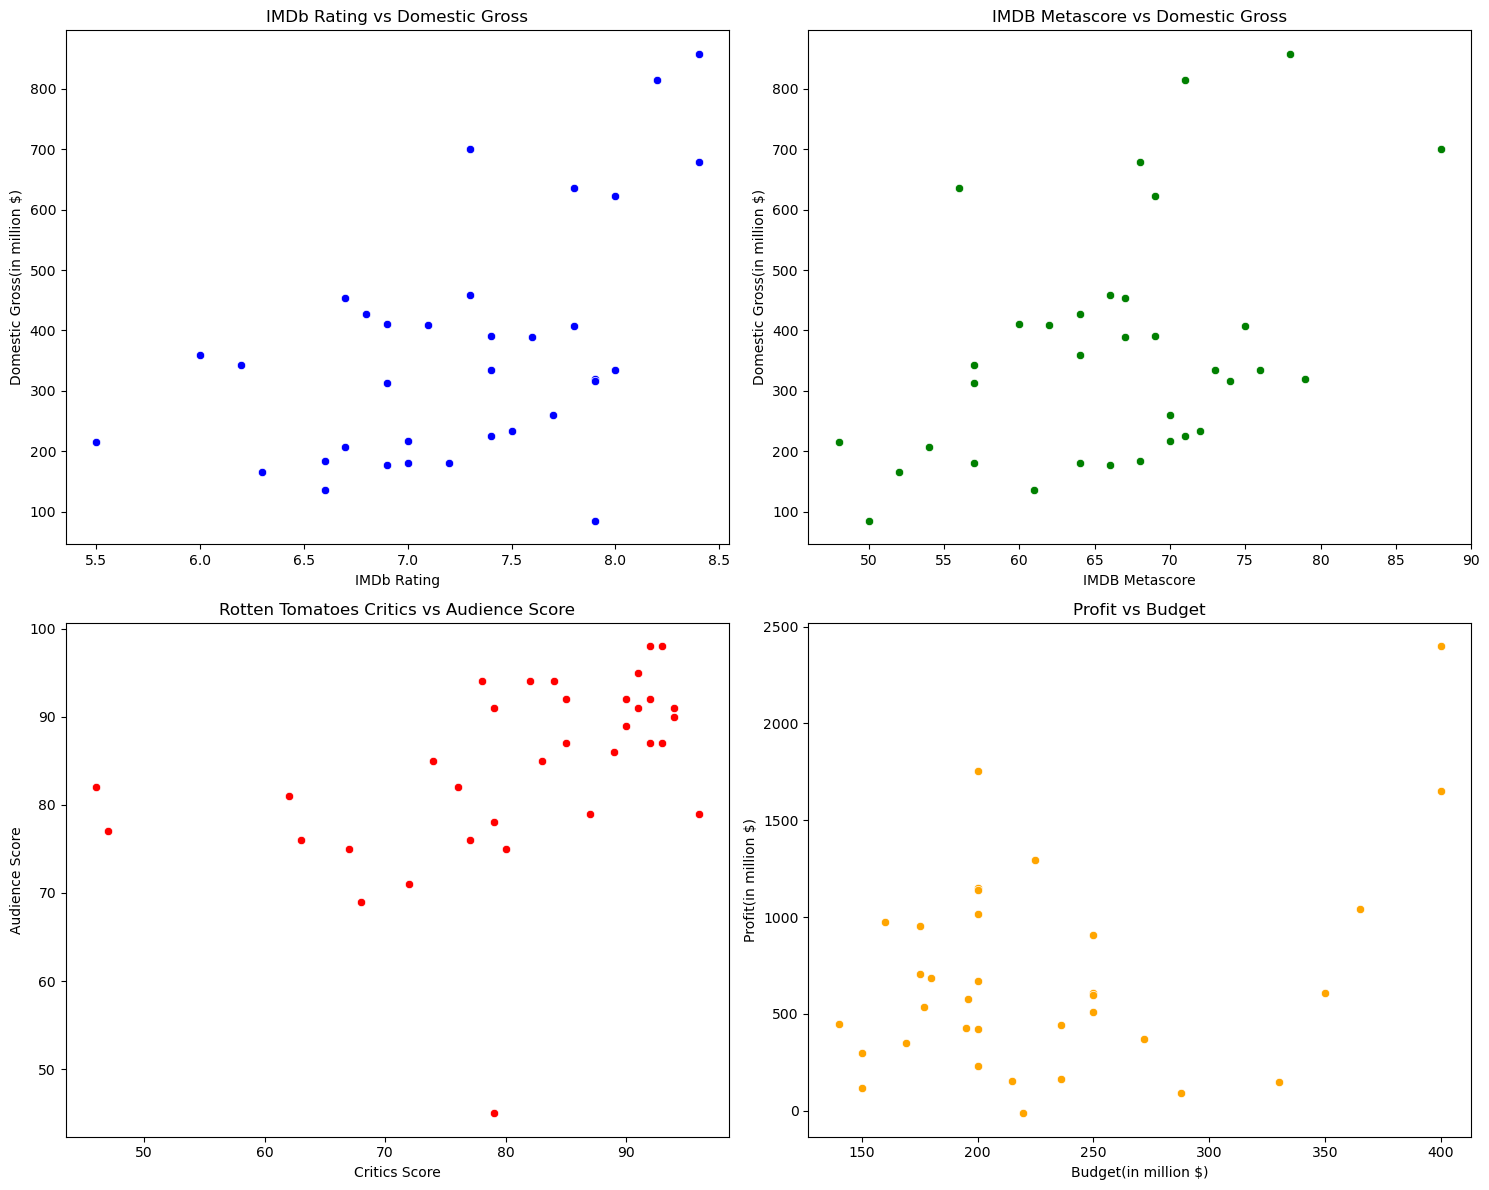

In [68]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.scatterplot(data=m,x='IMDb(scoredoutof10)',y='DomesticGross(inmillion$)',color='blue',ax=axes[0, 0])
axes[0, 0].set_title('IMDb Rating vs Domestic Gross')
axes[0, 0].set_xlabel('IMDb Rating')
axes[0, 0].set_ylabel('Domestic Gross(in million $)')
sns.scatterplot(data=m,x='IMDBMetascore(scoredoutof100)',y='DomesticGross(inmillion$)',color='green',ax=axes[0,1])
axes[0, 1].set_title('IMDB Metascore vs Domestic Gross')
axes[0, 1].set_xlabel('IMDB Metascore')
axes[0, 1].set_ylabel('Domestic Gross(in million $)')
sns.scatterplot(data=m,x='RottenTomatoes-Critics(scoredoutof100%)',y='RottenTomatoes-Audience(scoredoutof100%)',color='red',ax=axes[1,0])
axes[1, 0].set_title('Rotten Tomatoes Critics vs Audience Score')
axes[1, 0].set_xlabel('Critics Score')
axes[1, 0].set_ylabel('Audience Score')
sns.scatterplot(data=m,x='Budget(inmillion$)',y='profit',color='orange',ax=axes[1, 1])
axes[1, 1].set_title('Profit vs Budget')
axes[1, 1].set_xlabel('Budget(in million $)')
axes[1, 1].set_ylabel('Profit(in million $)')
plt.tight_layout()
plt.show()

###### **The heatmap reveals the correlation between different rating platforms, highlighting how closely audience and critic scores align or diverge.**

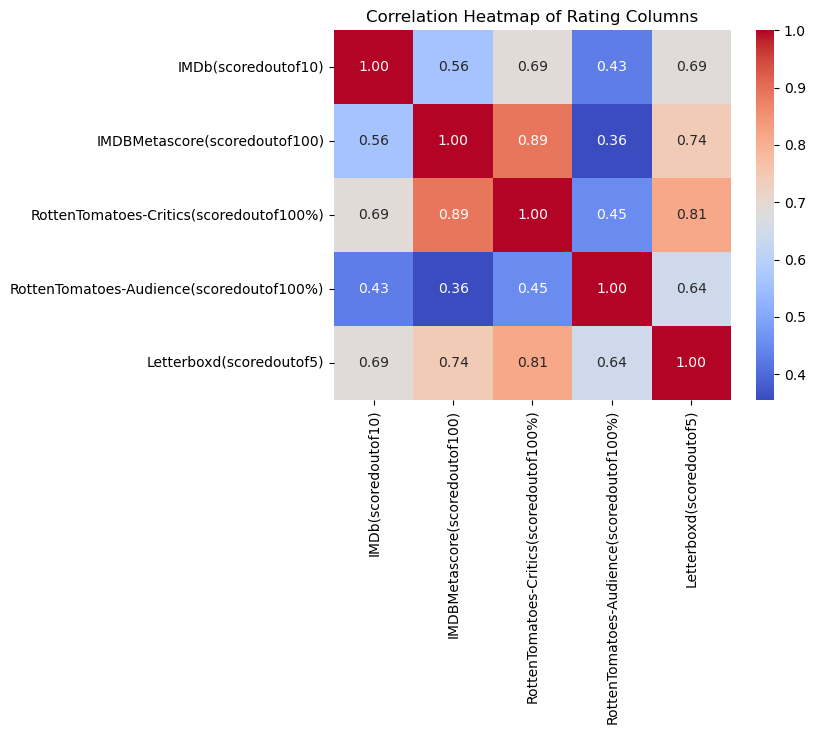

In [69]:
rating_columns=['IMDb(scoredoutof10)','IMDBMetascore(scoredoutof100)','RottenTomatoes-Critics(scoredoutof100%)','RottenTomatoes-Audience(scoredoutof100%)','Letterboxd(scoredoutof5)']
corr_matrix=m[rating_columns].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap of Rating Columns")
plt.show()

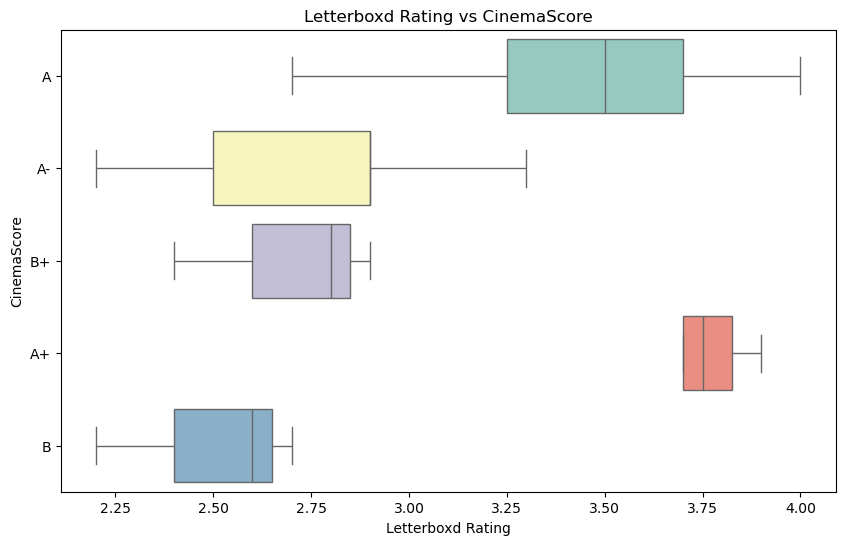

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=m,x='Letterboxd(scoredoutof5)',y='CinemaScore(gradesA+toF)',hue='CinemaScore(gradesA+toF)',palette="Set3",legend=False)
plt.title('Letterboxd Rating vs CinemaScore')
plt.xlabel('Letterboxd Rating')
plt.ylabel('CinemaScore')
plt.show()

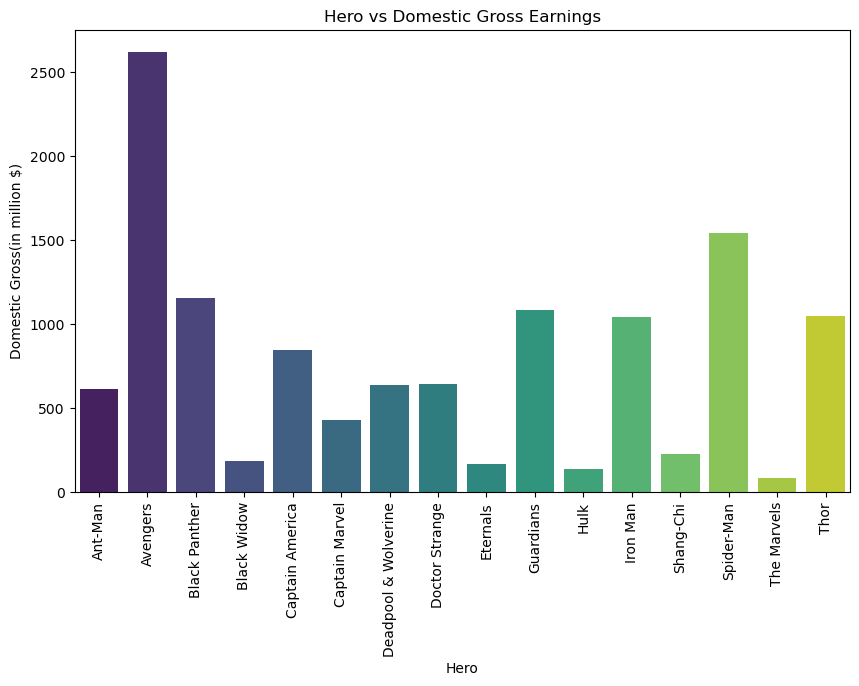

In [76]:
plt.figure(figsize=(10,6))
hero_gross = m.groupby('Hero')['DomesticGross(inmillion$)'].sum().reset_index()
sns.barplot(data=hero_gross, x='Hero', y='DomesticGross(inmillion$)',hue='Hero',palette='viridis')
plt.title('Hero vs Domestic Gross Earnings')
plt.xlabel('Hero')
plt.ylabel('Domestic Gross(in million $)')
plt.xticks(rotation=90)
plt.show()

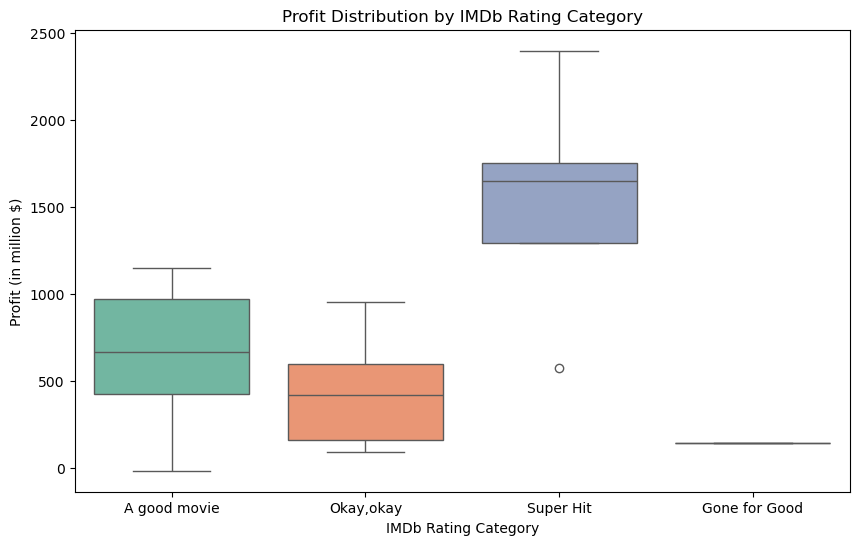

In [91]:
m['IMDb_rating_category']=m['IMDb(scoredoutof10)'].apply(imdb_rating)
plt.figure(figsize=(10,6))
sns.boxplot(data=m,x='IMDb_rating_category',y='profit',hue='IMDb_rating_category',palette='Set2')
plt.title('Profit Distribution by IMDb Rating Category')
plt.xlabel('IMDb Rating Category')
plt.ylabel('Profit (in million $)')
plt.show()

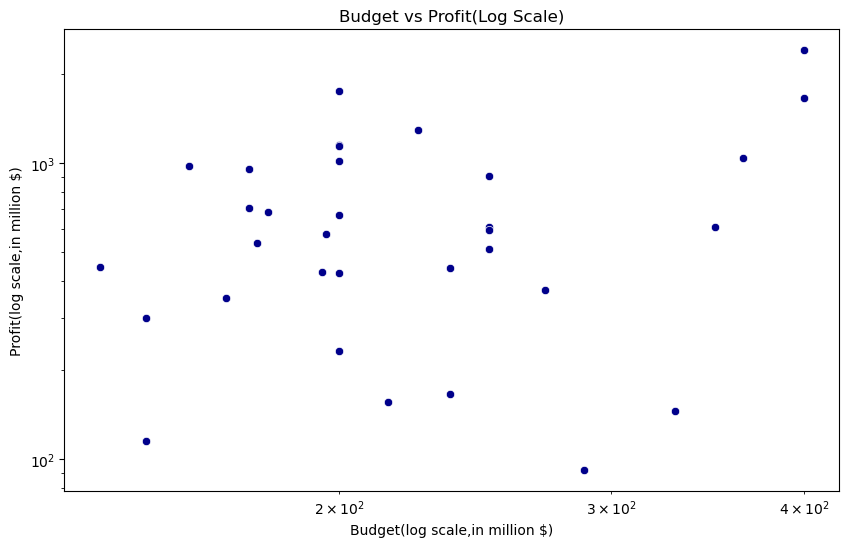

In [92]:
# The log scale makes it easier to compare movies with very different budgets and profits,helping us see if spending more money usually leads to higher profits!
plt.figure(figsize=(10,6))
sns.scatterplot(data=m,x='Budget(inmillion$)',y='profit',color='darkblue')
plt.xscale('log')
plt.yscale('log')
plt.title('Budget vs Profit(Log Scale)')
plt.xlabel('Budget(log scale,in million $)')
plt.ylabel('Profit(log scale,in million $)')
plt.show()

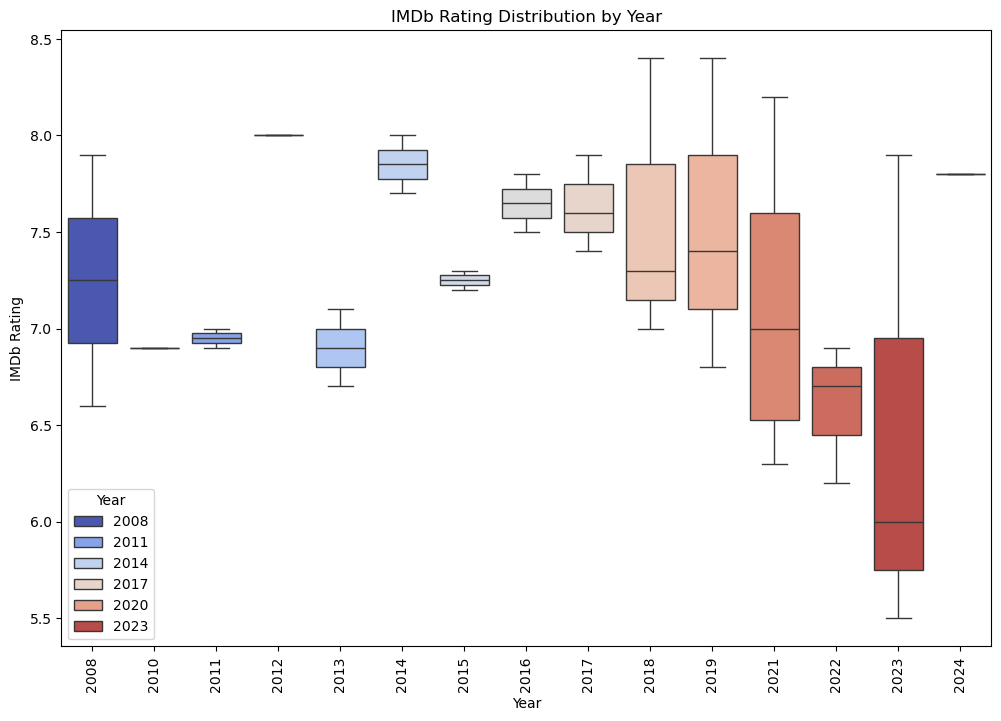

In [95]:
plt.figure(figsize=(12,8))
sns.boxplot(data=m, x='Year',y='IMDb(scoredoutof10)',hue='Year',palette='coolwarm')
plt.title('IMDb Rating Distribution by Year')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=90)
plt.show()

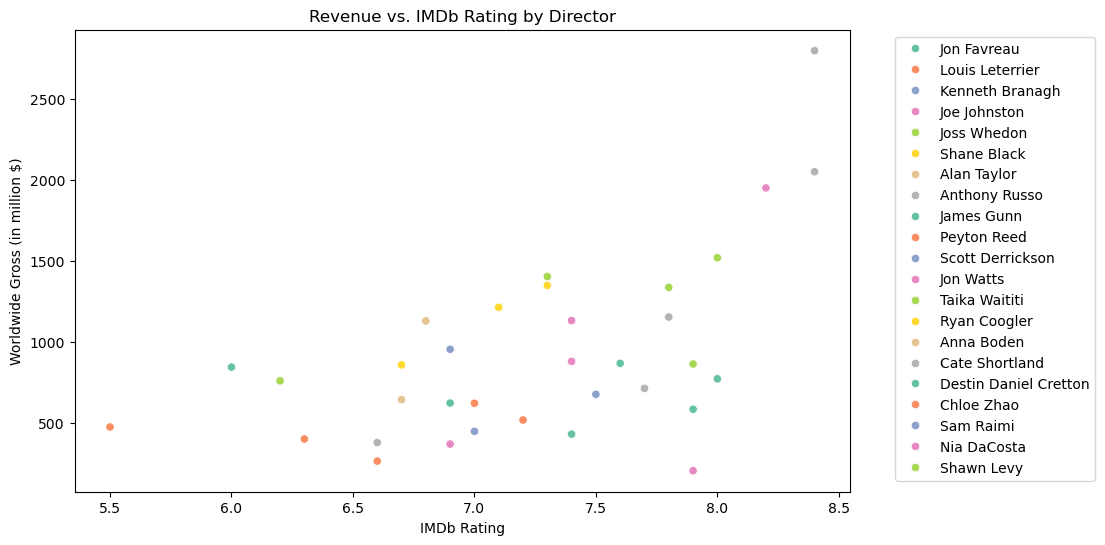

In [96]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(data=m, x='IMDb(scoredoutof10)',y='WorldwideGross(inmillion$)',hue='Director(1)',palette='Set2')
plt.title('Revenue vs. IMDb Rating by Director')
plt.xlabel('IMDb Rating')
plt.ylabel('Worldwide Gross (in million $)')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

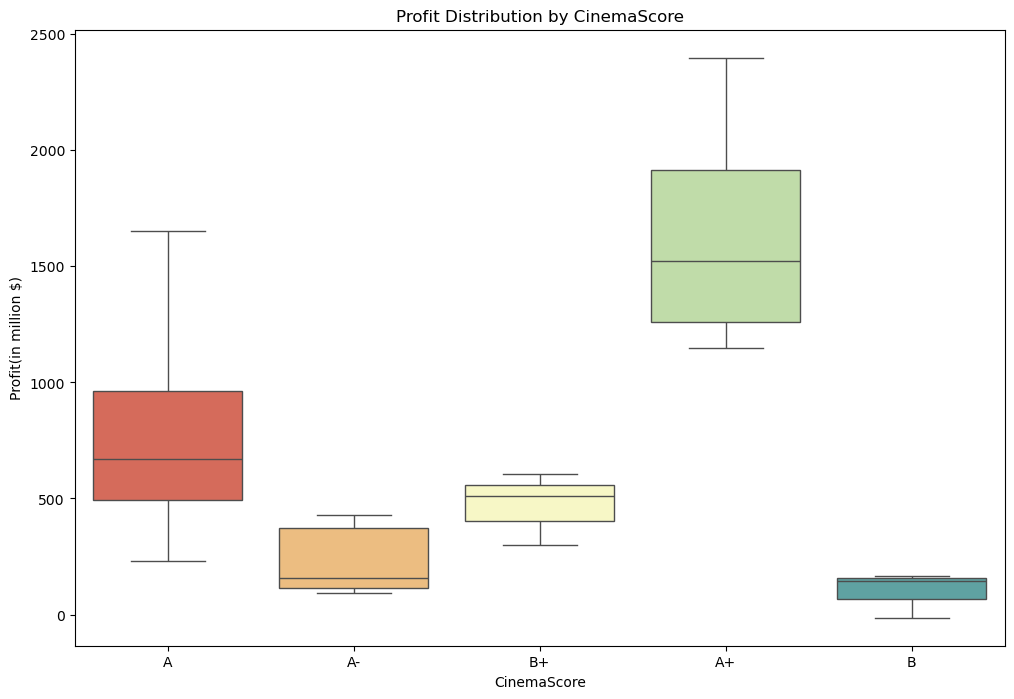

In [97]:
plt.figure(figsize=(12,8))
sns.boxplot(data=m, x='CinemaScore(gradesA+toF)',y='profit',hue='CinemaScore(gradesA+toF)',palette='Spectral')
plt.title('Profit Distribution by CinemaScore')
plt.xlabel('CinemaScore')
plt.ylabel('Profit(in million $)')
plt.show()

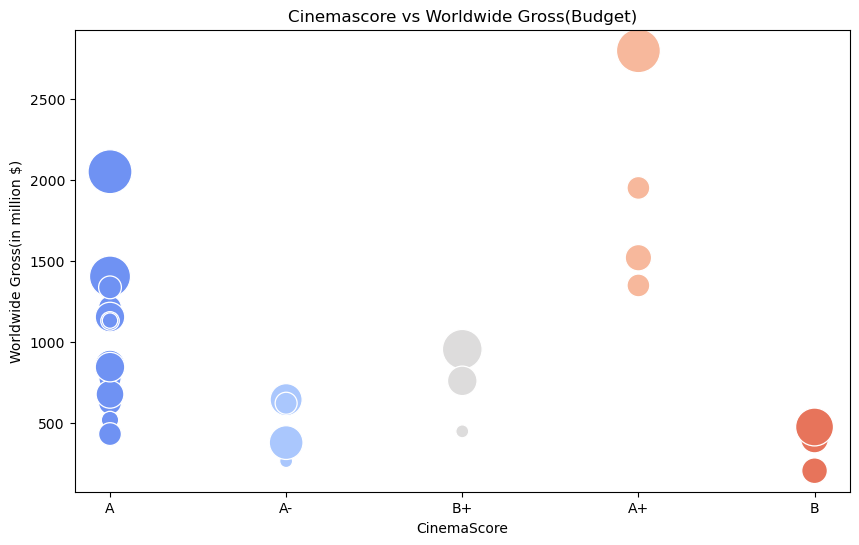

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=m,x='CinemaScore(gradesA+toF)',y='WorldwideGross(inmillion$)', 
                size='Budget(inmillion$)',hue='CinemaScore(gradesA+toF)',sizes=(50,1000),palette='coolwarm',legend=None)
plt.title('Cinemascore vs Worldwide Gross(Budget)') ## Bubbles
plt.xlabel('CinemaScore')
plt.ylabel('Worldwide Gross(in million $)')
plt.show()

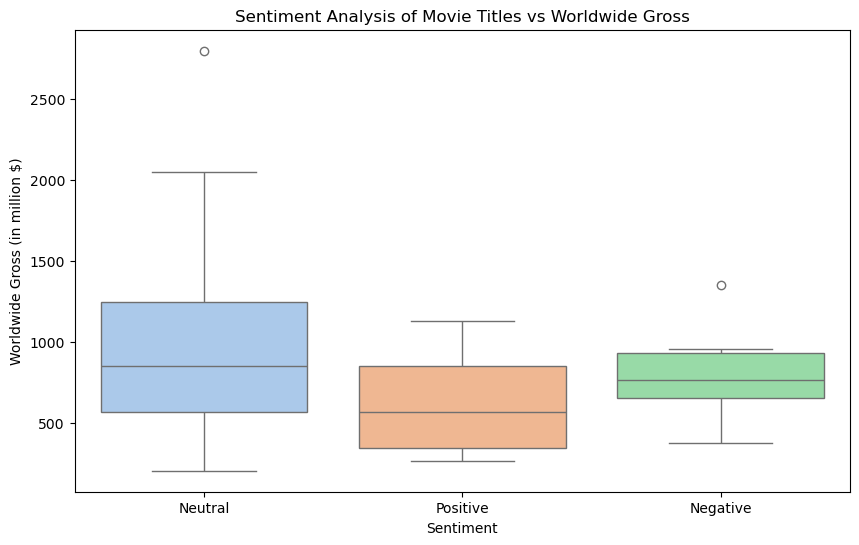

In [105]:
from textblob import TextBlob
def analyze_sentiment(title):
    analysis=TextBlob(title)
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

m['Sentiment']=m['Title'].apply(analyze_sentiment)
plt.figure(figsize=(10,6))
sns.boxplot(data=m,x='Sentiment',y='WorldwideGross(inmillion$)',hue='Sentiment',palette='pastel')
plt.title('Sentiment Analysis of Movie Titles vs Worldwide Gross')
plt.xlabel('Sentiment')
plt.ylabel('Worldwide Gross (in million $)')
plt.show()

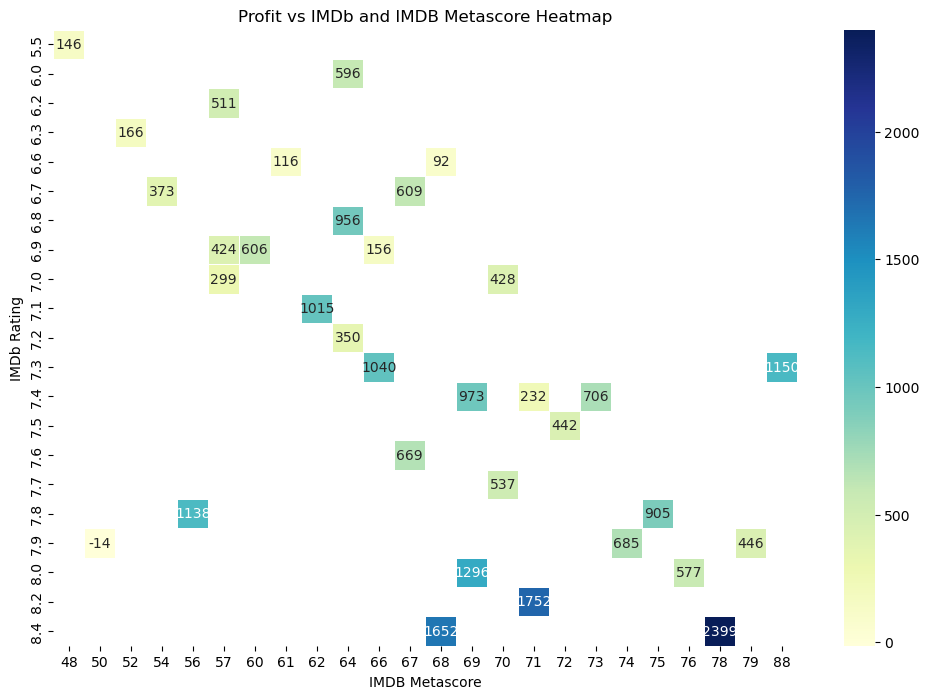

In [109]:
# Brighter (yellowish) areas → Lower profits.
# Darker (bluish) areas → Higher profits.
pivot_table = m.pivot_table(index='IMDb(scoredoutof10)',columns='IMDBMetascore(scoredoutof100)',values='profit',aggfunc=np.mean)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table,cmap='YlGnBu',annot=True,fmt='.0f',linewidths=0.5)
plt.title('Profit vs IMDb and IMDB Metascore Heatmap')
plt.xlabel('IMDB Metascore')
plt.ylabel('IMDb Rating')
plt.show()

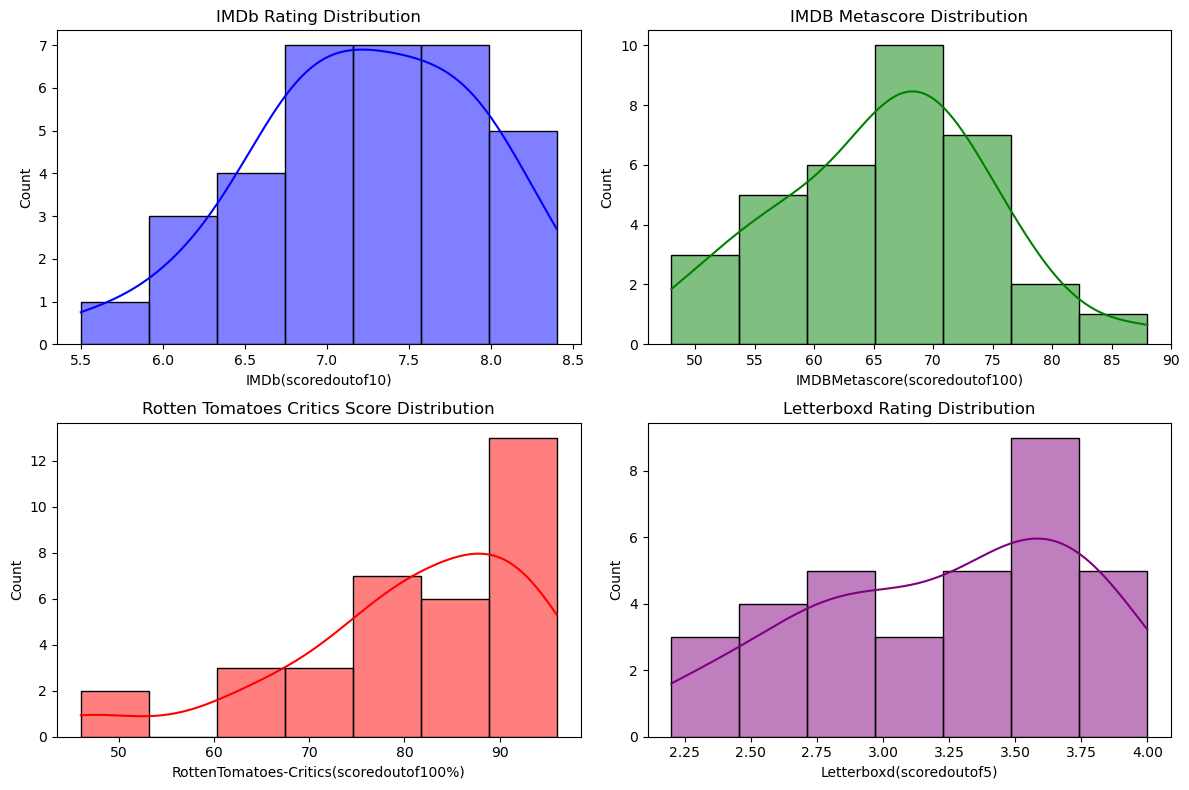

In [112]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(m['IMDb(scoredoutof10)'],kde=True,color='blue')
plt.title('IMDb Rating Distribution')
plt.subplot(2,2,2)
sns.histplot(m['IMDBMetascore(scoredoutof100)'],kde=True,color='green')
plt.title('IMDB Metascore Distribution')
plt.subplot(2,2,3)
sns.histplot(m['RottenTomatoes-Critics(scoredoutof100%)'],kde=True,color='red')
plt.title('Rotten Tomatoes Critics Score Distribution')
plt.subplot(2,2,4)
sns.histplot(m['Letterboxd(scoredoutof5)'],kde=True,color='purple')
plt.title('Letterboxd Rating Distribution')
plt.tight_layout()
plt.show()

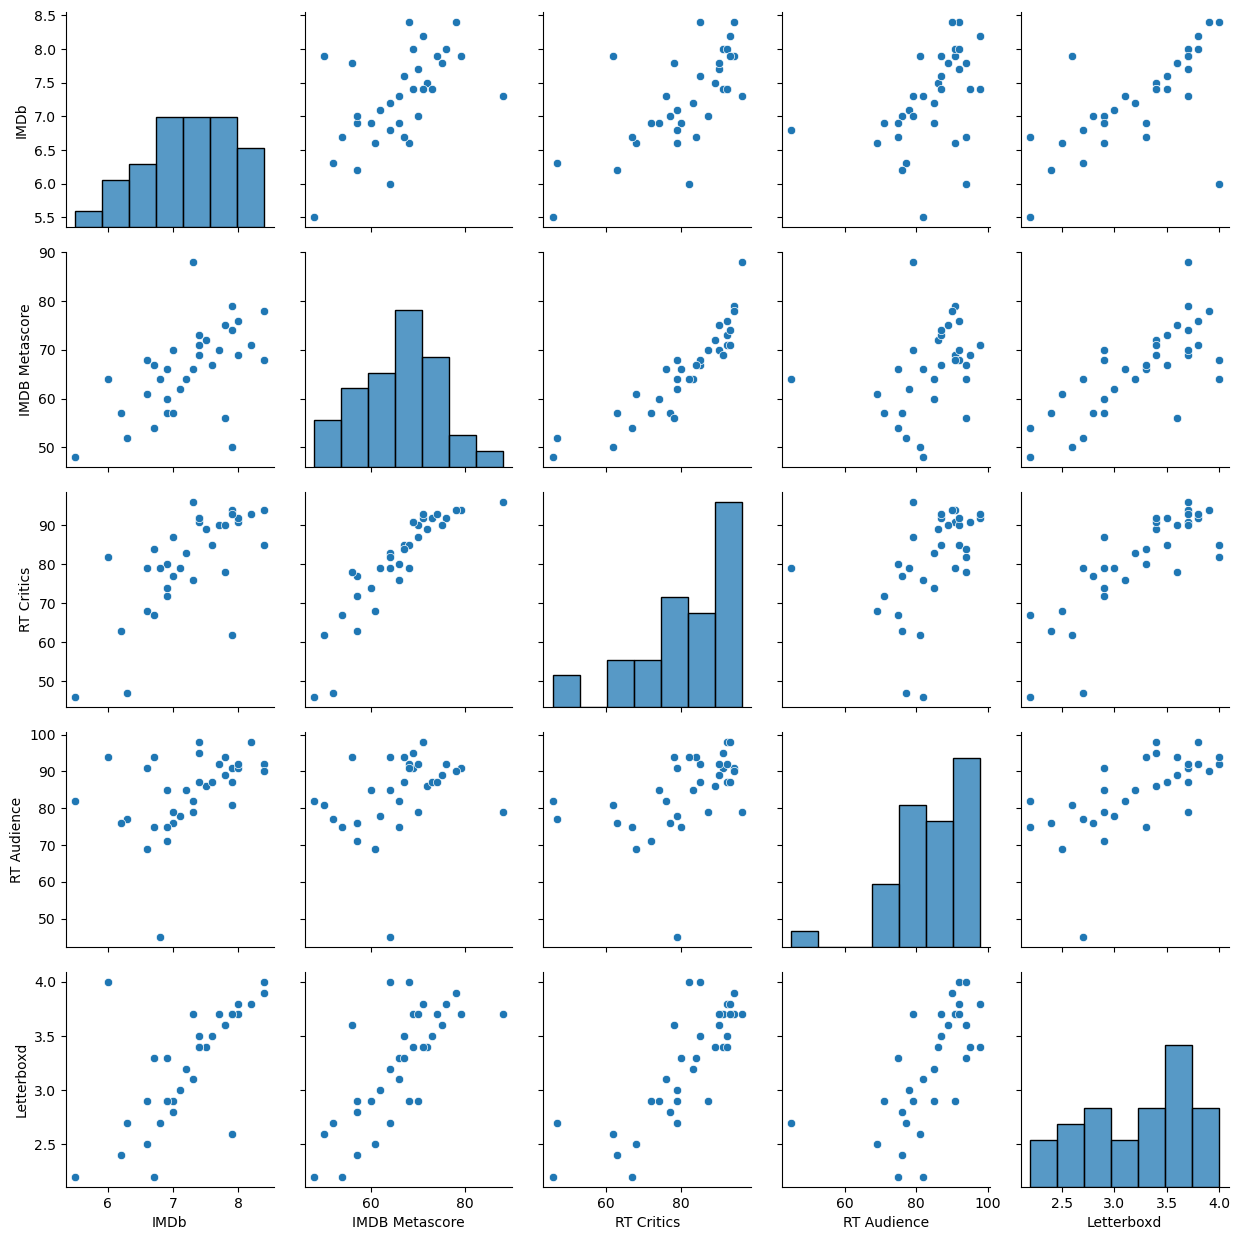

In [110]:
labels={'IMDb(scoredoutof10)':'IMDb','IMDBMetascore(scoredoutof100)':'IMDB Metascore','RottenTomatoes-Critics(scoredoutof100%)':'RT Critics','RottenTomatoes-Audience(scoredoutof100%)':'RT Audience','Letterboxd(scoredoutof5)':'Letterboxd'}
rename=m.rename(columns=labels)
sns.pairplot(rename[list(labels.values())])
plt.tight_layout()
plt.show()

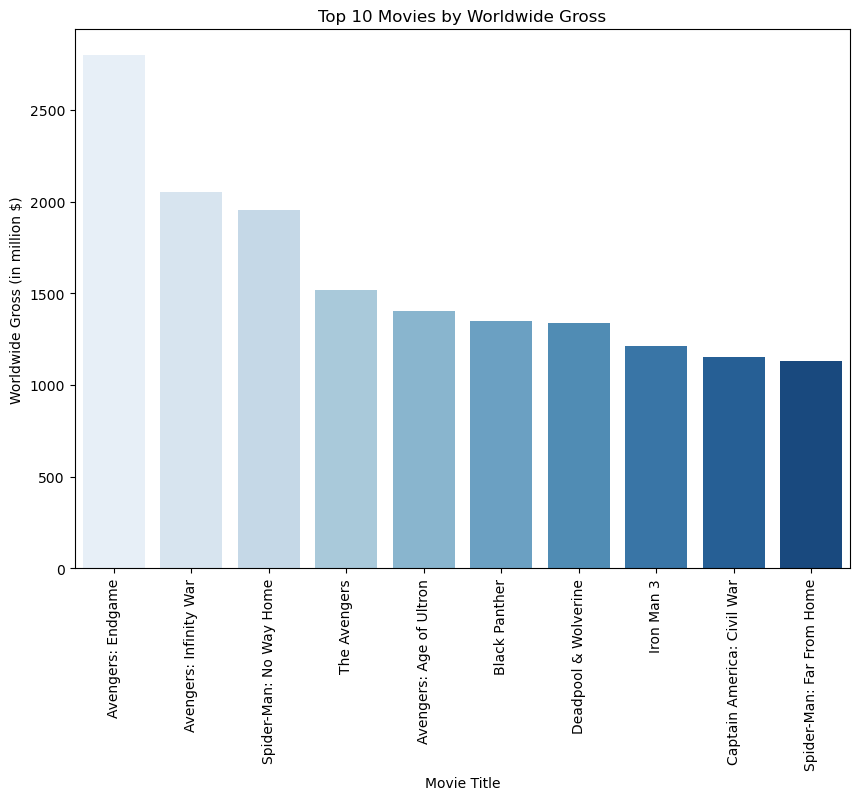

In [113]:
top_10_movies = m.nlargest(10,'WorldwideGross(inmillion$)')
plt.figure(figsize=(10,7))
sns.barplot(data=top_10_movies,x='Title',y='WorldwideGross(inmillion$)',hue='Title',palette='Blues')
plt.title('Top 10 Movies by Worldwide Gross')
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross (in million $)')
plt.xticks(rotation=90)
plt.show()

# **Financial Analysis of Avengers: Endgame**
### The production cost of Avengers: Endgame amounted to $400 million, equivalent to 
# approximately ₹3,397.11 crores (INR). The film achieved a remarkable worldwide gross revenue of $2,800 million (₹23,778.43 crores INR), highlighting its massive commercial success.

### This resulted in an impressive profit of $2,400 million (₹20,383.80 crores INR), making it one of the highest-grossing and most profitable films in cinematic history. The extraordinary return on investment underscores the significant financial impact of blockbuster franchise films within the global entertainment industry.

In [114]:
m.profit.sum()
# $23,427.40 million dollars

23427.399999999998

#### ***Bhai, pura Marvel ka danda ₹1.94 lakh crore ka profit uda chuka hai! Matlab $23.4 billion ko INR mein badlo toh calculator bhi sharma jaaye! 🤯 Itna paisa hai ki Tony Stark bhi sochta, ‘Bas kar bhai, ab toh retirement le leta!***

#### Disney bought Marvel for just $4 billion in 2009… and today, Endgame alone has made 5x that in profit!🤯 Basically, Mickey Mouse snapped his fingers, and the entire entertainment industry fell into his hands!

![Bob](https://www.indiewire.com/wp-content/uploads/2019/08/shutterstock_10214069cb.jpg?w=3000&h=1687&crop=1&resize=1200%2C675)

#### *Mr. Bob Iger, the current CEO of Disney (including Marvel Studios), holds the highest shares among all. Basically, he's the real-life Nick Fury, but instead of assembling Avengers, he's assembling billions!*

## ***Bhai, Marvel se hi itne million kama raha hai, soch baaki studios se kitna paisa barsa raha hoga!Yeh sirf business nahi, ek legacy hai-legendary Mr. Walt Disney ki. Mickey Mouse se lekar Marvel tak, empire bas badhta hi ja raha hai!🏰***

## I envy Mr.Bob.
##### Bhai, Bob Iger ki life dekh ke toh sach mein jalan hoti hai!😤Banda ek button dabata hai aur billion dollars aa jate hain! Marvel, Star Wars, Pixar—pura entertainment ka thaath jama rakha hai!

### *Arre bhai, ₹23,778.43 crore chhap diye, ab ratings dekhke kya karenge? Paisa hi asli IMDB hai!*

## *Bilkul bhai! Multiverse ho ya real world, end mein paisa hi sabse bada superhero hai!Tony Stark bhi keh ke gaya tha "Money can't buy happiness... but it can build a damn cool Iron Man suit!*"

# ***Koi aur punchline chahiye toh bata 🔹(~~Discord ID: sunny__0103~~), warna officially declare karte hain—Marvel ka asli superpower paisa hai!😂***

### **The cinematic legacy of our heroes, counted and conquered—from April 14, 2008, to December 6, 2014!**